In [283]:
import numpy as np

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

matplotlib.rc('font', family = "NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

In [284]:
df_order = pd.read_csv("log_order_sheet_001.csv")

df_order = df_order.drop(["Unnamed: 0"], axis = 1)
df_order

/home/piai/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


결제수단     공급원가  교환구분  네이버 포인트                   배송번호 배송비 정보  \
0      무통장입금  44550.0  교환안함        0  D-20181227-0000648-00     무료   
1      무통장입금  44000.0  교환안함        0  D-20181229-0000119-00     무료   
2      무통장입금   6820.0  교환안함        0  D-20181230-0000100-00     무료   
3      무통장입금  49500.0  교환안함        0  D-20181231-0000087-00     무료   
4      무통장입금  61600.0  교환안함        0  D-20181231-0000108-00     무료   
...      ...      ...   ...      ...                    ...    ...   
46744     카드  36300.0  교환안함        0  D-20171229-0000036-00     무료   
46745     카드  36300.0  교환안함        0  D-20171229-0000043-00     무료   
46746     카드  22280.0  교환안함      300  D-20171230-0000022-01     무료   
46747     카드  55000.0  교환안함      320  D-20171231-0000017-01     무료   
46748     카드  52800.0  교환안함        0  D-20171231-0000026-00     무료   

                     배송시작일               배송완료일  사용한 적립금액  상품구매금액  \
0       2019-01-07 오전 8:56  2019-01-11 오전 5:32         0   71450   
1       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0  141240   
2       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0   13910   
3       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0   81600   
4       2019-01-07 오전 8:56  2019-01-11 오전 5:32         0   94710   
...                    ...                 ...       ...     ...   
46744   2017-12-29 오후 4:32  2018-01-02 오전 5:31         0   52800   
46745   2018-01-03 오전 9:45  2018-01-07 오전 5:38         0  112200   
46746   2018-01-02 오후 7:06  2018-01-11 오전 2:46         0   36000   
46747   2018-01-03 오후 2:00  2018-01-06 오후 6:06         0   73460   
46748  2018-01-03 오후 12:43  2018-01-07 오전 5:38         0   81620   

                                                  상품명   상품번호  상품별 추가할인금액  \
0                          195파이 탕용기 소 300개 1set(2박스)   1077       13600   
1      95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)     42       19800   
2                                  비닐봉투 배달중 중 백색 200개   1271        2900   
3                       195파이 미니탕용기 투톤 300개 1set(2박스)   1085       12630   
4                          250파이 원형 접시 미니 블랙 400개 1박스   1106       18000   
...                                               ...    ...         ...   
46744                          PP 4칸 도시락용기 A 200개 1박스  445.0        6340   
46745                         PP 6칸 도시락용기 02 200개 1박스  172.0       13460   
46746                          170mm 수저 투명 1,500개 1박스  140.0        3600   
46747     170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스)  184.0        5140   
46748         125파이 원형용기 중 350ml 백색 PP 600개 1set(2박스)  479.0       12240   

                             수령인 주소    주문경로              주문번호  \
0          경상남도 거제시 능포로 168-1 (능포동)   PC쇼핑몰  20181227-0000648   
1        서울특별시 동대문구 한천로36길 16 (장안동)    모바일웹  20181229-0000119   
2             세종특별자치시 호려울로 29 (보람동)    모바일웹  20181230-0000100   
3         부산광역시 부산진구 가야대로 482 (개금동)    모바일웹  20181231-0000087   
4      부산광역시 해운대구 선수촌로 104-21 (반여동)    모바일웹  20181231-0000108   
...                             ...     ...               ...   
46744    서울특별시 서초구 강남대로97길 23 (잠원동)    모바일웹  20171229-0000036   
46745        경기도 의정부시 용민로 483 (민락동)    모바일웹  20171229-0000043   
46746                 대전광역시 서구 관저2동  네이버 페이  20171230-0000022   
46747         광주광역시 서구 화운로 152 (화정동  네이버 페이  20171231-0000017   
46748   충청남도 천안시 서북구 성환읍 성환리 449-43    모바일웹  20171231-0000026   

                      주문일시       주문자ID      카드사  쿠폰 할인금액    판매가   품목번호    친환경  \
0       2018-12-27 오후 2:54       pp683       기타        0  71450  42602  False   
1       2018-12-29 오후 1:22     asd0908       기타        0  70620  42930  False   
2       2018-12-30 오후 3:15         NaN       기타        0  13910  42998  False   
3      2018-12-31 오전 10:30  23533593@n       기타        0  81600  43063  False   
4      2018-12-31 오전 10:43   romandoll       기타        0  94710  43066  False   
...                    ...         ...      ...      ...    ...    ...    ...   
46744   2017-12-29 오후 1:39  73987748@n       국민        0  52800   3170  False   
46745   

In [285]:
df_order["상품구매금액"]

0         71450
1        141240
2         13910
3         81600
4         94710
          ...  
46744     52800
46745    112200
46746     36000
46747     73460
46748     81620
Name: 상품구매금액, Length: 46749, dtype: int64

In [286]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품',
       '회원', '주문수량', '총수량'],
      dtype='object')

In [287]:
df_order["주문자ID"]

0             pp683
1           asd0908
2               NaN
3        23533593@n
4         romandoll
            ...    
46744    73987748@n
46745     chuheesuk
46746           NaN
46747           NaN
46748      rmxehfdl
Name: 주문자ID, Length: 46749, dtype: object

In [309]:
df_order["회원"]

df_order["회원"].value_counts()

True     43644
False     3105
Name: 회원, dtype: int64

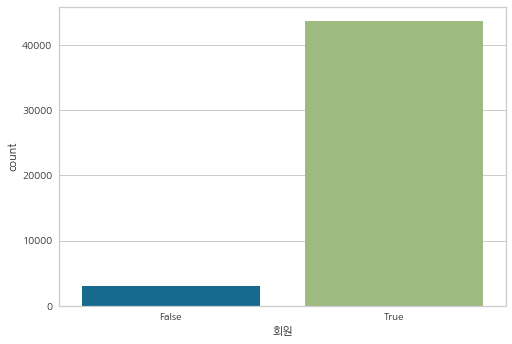

In [324]:
df_회원 = df_order["회원"]

sns.countplot(df_회원)

<BarContainer object of 6 artists>

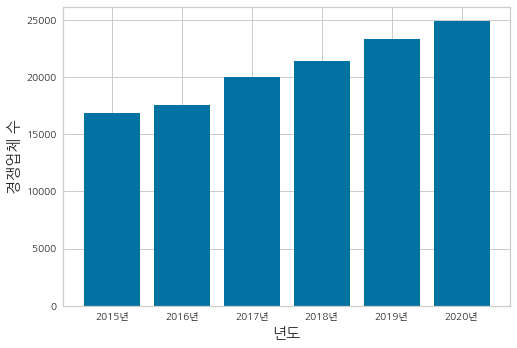

In [328]:
년도_list = ["2015년", "2016년", "2017년", "2018년", "2019년", "2020년"]
경쟁업체수_list = [16821, 17539, 20000, 21383, 23357, 24887]

plt.rc("font", size = 10)
plt.xlabel("년도",fontsize=15)
plt.ylabel("경쟁업체 수",fontsize=15)
#plt.title("<우수고객과 일반고객의 구매당 총지불금액 차>")

plt.bar(년도_list, 경쟁업체수_list)

# 회원이면 구매금액이 클까?

In [288]:
t_result = stats.ttest_ind(df_order["회원"] == True, df_order["회원"] == False)
t, p = t_result.statistic.round(3), t_result.pvalue.round(10)
print("2-Sample t-test")
print(t_result)
print("t : {}".format(t))
print("p : {}".format(p)) # < 0.05 : 차이는 있다! 어디가 높을까?

2-Sample t-test
Ttest_indResult(statistic=532.4103328452022, pvalue=0.0)
t : 532.41
p : 0.0


In [289]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품',
       '회원', '주문수량', '총수량'],
      dtype='object')

In [290]:
df_회원판매가 = df_order[df_order["회원"] == True]["판매가"]

df_회원판매가

df_회원상품구매금액 = df_order[df_order["회원"] == True]["상품구매금액"]
df_회원공급원가 = df_order[df_order["회원"] == True]["공급원가"]
df_회원사용한적립금액 = df_order[df_order["회원"] == True]["사용한 적립금액"]
df_회원상품별추가할인금액 = df_order[df_order["회원"] == True]["상품별 추가할인금액"]
df_회원쿠폰할인금액 = df_order[df_order["회원"] == True]["쿠폰 할인금액"]

df_회원영업이익 = df_회원상품구매금액 - df_회원공급원가 - df_회원사용한적립금액 - df_회원상품별추가할인금액 - df_회원쿠폰할인금액

df_회원영업이익

0        13300.0
1        77440.0
3        19470.0
4        15110.0
5        15910.0
          ...   
46742    17200.0
46743    -1910.0
46744    10160.0
46745    62440.0
46748    16580.0
Length: 43644, dtype: float64

In [291]:
df_비회원판매가 = df_order[df_order["회원"] != True]["판매가"]

df_비회원판매가

df_비회원상품구매금액 = df_order[df_order["회원"] != True]["상품구매금액"]
df_비회원공급원가 = df_order[df_order["회원"] != True]["공급원가"]
df_비회원사용한적립금액 = df_order[df_order["회원"] != True]["사용한 적립금액"]
df_비회원상품별추가할인금액 = df_order[df_order["회원"] != True]["상품별 추가할인금액"]
df_비회원쿠폰할인금액 = df_order[df_order["회원"] != True]["쿠폰 할인금액"]

df_비회원영업이익 = df_비회원상품구매금액 - df_비회원공급원가

df_비회원영업이익


2         7090.0
40       47250.0
41       17600.0
47       26070.0
57       29370.0
          ...   
46739    14300.0
46740    14520.0
46741    17380.0
46746    13720.0
46747    18460.0
Length: 3105, dtype: float64

In [292]:
t_result = stats.ttest_ind(df_회원영업이익, df_비회원영업이익)
t, p = t_result.statistic.round(3), t_result.pvalue.round(10)
print("2-Sample t-test")
print(t_result)
print("t : {}".format(t))
print("p : {}".format(p)) # < 0.05 : 차이는 있다! 어디가 높을까?

2-Sample t-test
Ttest_indResult(statistic=-17.59294694823675, pvalue=4.661554565719077e-69)
t : -17.593
p : 0.0


In [293]:
p < 0.05 # 회원, 비회원 영업이익 평균에는 차이가 존재한다!

True

In [294]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품',
       '회원', '주문수량', '총수량'],
      dtype='object')

In [295]:
df_order["영업이익"]=df_order["상품구매금액"]-df_order["공급원가"]*df_order["주문수량"]

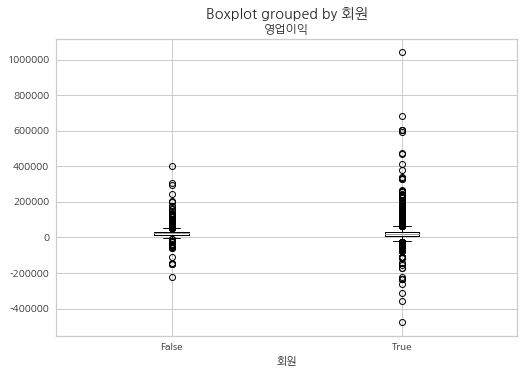

In [296]:
df_order.boxplot(column="영업이익",by="회원")

20719.376775730914 vs 26616.290499194845
904276480.0
82643582.0
986920062.0


<function matplotlib.pyplot.show(*args, **kw)>

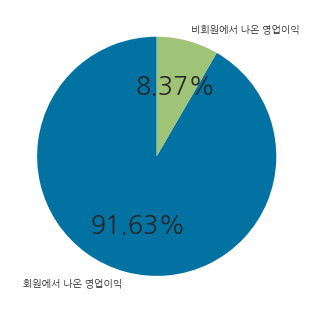

In [305]:
df_회원 = df_order[df_order["회원"]]
df_비회원 = df_order[df_order["회원"] == False]

회원평균영업이익 = df_회원["영업이익"].sum() / len(df_회원)
비회원평균영업이익 = df_비회원["영업이익"].sum() / len(df_비회원)

print(회원평균영업이익, "vs", 비회원평균영업이익)

총영업이익 = df_회원["영업이익"].sum() + df_비회원["영업이익"].sum()
회원영업이익 = df_회원["영업이익"].sum()
비회원영업이익 = df_비회원["영업이익"].sum()


print(회원영업이익)
print(비회원영업이익)
print(총영업이익)

plt.rc("font", size = 25)
#plt.xlabel("연령")
#plt.ylabel("우수고객총구매당지불금액 - 일반고객총구매당지불금액")
#plt.title("<우수고객과 일반고객의 구매당 총지불금액 차>")
labels = ["회원에서 나온 영업이익", "비회원에서 나온 영업이익"]
ratio = [회원영업이익/총영업이익, 비회원영업이익/총영업이익]

plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

In [20]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df_영업이익이상치 = df_order[df_order["영업이익"] < 0]

df_영업이익이상치.head(500)

결제수단      공급원가  교환구분  네이버 포인트                   배송번호 배송비 정보  \
113               카드  203280.0  교환안함        0  D-20190102-0000294-00     무료   
114               카드   41580.0  교환안함        0  D-20190102-0000294-01     무료   
116               카드  203280.0  교환안함        0  D-20190102-0000314-00     무료   
117               카드   41580.0  교환안함        0  D-20190102-0000314-01     무료   
462               카드  180180.0  교환안함        0  D-20190104-0000765-01     무료   
909               카드   41580.0  교환안함        0  D-20190109-0000510-00     무료   
910               카드  203280.0  교환안함        0  D-20190109-0000510-01     무료   
989               카드  180180.0  교환안함        0  D-20190110-0000065-00     무료   
1056              카드   41580.0  교환안함        0  D-20190110-0000557-00     무료   
1057              카드  203280.0  교환안함        0  D-20190110-0000557-01     무료   
1058              카드  203280.0  교환안함        0  D-20190110-0000569-00     무료   
1059              카드   41580.0  교환안함        0  D-20190110-0000569-01     무료   
1094          적립금,카드   27720.0  교환안함        0  D-20190110-0000835-00     선불   
1095          적립금,카드  143220.0  교환안함        0  D-20190110-0000835-01     선불   
1232              카드  203280.0  교환안함        0  D-20190113-0000033-00     무료   
1233              카드   41580.0  교환안함        0  D-20190113-0000033-01     무료   
1393           무통장입금   15400.0  교환안함        0  D-20190114-0000793-00     무료   
1486           무통장입금  203280.0  교환안함        0  D-20190115-0000326-00     무료   
1487           무통장입금   41580.0  교환안함        0  D-20190115-0000337-00     무료   
1829              카드  203280.0  교환안함        0  D-20190117-0000617-00     무료   
1843           무통장입금    6140.0  교환안함        0  D-20190117-0000731-00     무료   
2297           무통장입금  153700.0  교환안함        0  D-20190123-0000131-00     무료   
2553              카드  203280.0  교환안함        0  D-20190124-0000558-00     무료   
2554              카드   41580.0  교환안함        0  D-20190124-0000558-01     무료   
2657              카드  203280.0  교환안함        0  D-20190125-0000516-00     무료   
2909           무통장입금  226380.0  교환안함        0  D-20190128-0000634-00     무료   
2980              카드   41580.0  교환안함        0  D-20190128-0001007-00     무료   
2981              카드  203280.0  교환안함        0  D-20190128-0001007-01     무료   
3124              카드  180180.0  교환안함        0  D-20190128-0001977-00     무료   
3949              카드  180180.0  교환안함        0  D-20190208-0000855-00     무료   
4163           무통장입금    6140.0  교환안함        0  D-20190211-0000556-00     무료   
4651              카드  157080.0  교환안함        0  D-20190214-0000541-01     무료   
4765              카드   32340.0  교환안함        0  D-20190215-0000331-00     무료   
4766              카드  203280.0  교환안함        0  D-20190215-0000331-01     무료   
4767              카드   41580.0  교환안함        0  D-20190215-0000331-02     무료   
4768              카드  143220.0  교환안함        0  D-20190215-0000331-03     무료   
5101           무통장입금  157080.0  교환안함        0  D-20190218-0001193-00     무료   
6622       적립금,무통장입금    6140.0  교환안함        0  D-20190304-0000220-00     무료   
6723           무통장입금  324500.0  교환안함        0  D-20190304-0000897-04     무료   
8040           무통장입금   45000.0  교환안함        0  D-20190313-0000889-00     무료   
9056           무통장입금   45000.0  교환안함        0  D-20190321-0000626-00     무료   
12166          무통장입금   45000.0  교환안함        0  D-20190416-0000402-02     무료   
14761             카드   45000.0  교환안함        0  D-20190507-0001653-00     무료   
15060          무통장입금   45000.0  교환안함        0  D-20190509-0000898-00     무료   
16201             카드   45000.0  교환안함        0  D-20190520-0000631-00     무료   
16775          무통장입금   48000.0  교환안함        0  D-20190524-0000559-00     무료   
17551          무통장입금    2310.0  교환안함        0  D-20171227-0000094-00     무료   
17562          무통장입금    1910.0  교환안함        0  D-20180102-0000022-00     무료   
17565             카드    8800.0  교환안함        0  D-20180102-0000045-00     무료   
17569             카드    4690.0  교환안함        0  D-20180102-0000073-

In [21]:
##?????????
## 제거해야할까???

df_상품금액0원 = df_order[df_order["상품구매금액"] == 0]

df_상품금액0원

df_사은품이아닌상품금액0원 = df_상품금액0원[df_상품금액0원["사은품"] != True]

df_사은품이아닌상품금액0원

df_사은품이아닌상품금액0원["영업이익"]=df_사은품이아닌상품금액0원["상품구매금액"]-df_사은품이아닌상품금액0원["공급원가"]
df_테스트결과 = df_사은품이아닌상품금액0원[df_사은품이아닌상품금액0원["영업이익"] < 0]
df_테스트결과

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


결제수단    공급원가  교환구분  네이버 포인트                   배송번호 배송비 정보  \
17551   무통장입금  2310.0  교환안함        0  D-20171227-0000094-00     무료   
17562   무통장입금  1910.0  교환안함        0  D-20180102-0000022-00     무료   
17580   무통장입금  1910.0  교환안함        0  D-20180102-0000152-00     무료   
17606      카드  1910.0  교환안함        0  D-20180104-0000041-00     무료   
17611      카드  2100.0  교환안함        0  D-20180104-0000056-00     무료   
...       ...     ...   ...      ...                    ...    ...   
46699  적립금,카드  1910.0  교환안함        0  D-20171226-0000098-00     무료   
46706   무통장입금  1290.0  교환안함        0  D-20171226-0000181-00     무료   
46717   무통장입금  1910.0  교환안함        0  D-20171227-0000055-00     무료   
46724   무통장입금  2100.0  교환안함        0  D-20171228-0000041-00     무료   
46743   무통장입금  1910.0  교환안함        0  D-20171229-0000026-00     무료   

                     배송시작일               배송완료일  사용한 적립금액  상품구매금액  \
17551   2018-01-02 오후 5:59  2018-01-06 오전 5:33         0       0   
17562  2018-01-05 오전 10:02  2018-01-09 오전 5:35         0       0   
17580   2018-01-04 오전 8:49  2018-01-08 오전 5:36         0       0   
17606   2018-01-04 오후 9:09  2018-01-08 오전 5:36         0       0   
17611   2018-01-04 오후 9:09  2018-01-08 오전 5:36         0       0   
...                    ...                 ...       ...     ...   
46699   2017-12-26 오후 5:39  2017-12-30 오전 5:36     17140       0   
46706   2017-12-27 오후 4:46  2017-12-31 오전 5:36         0       0   
46717   2017-12-27 오후 4:46  2017-12-31 오전 5:36         0       0   
46724   2017-12-28 오후 6:20  2018-01-01 오전 5:37         0       0   
46743   2017-12-29 오후 4:32  2018-01-02 오전 5:31         0       0   

                          상품명   상품번호  상품별 추가할인금액  \
17551          친환경 종이호일 1호 2개    582           0   
17562                 고무장갑 2개    583           0   
17580          스폰지 양면 수세미(2개)    534           0   
17606           스폰지 양면 수세미 4개    579           0   
17611         위생 면행주 칼라 3매 2개    580           0   
...                       ...    ...         ...   
46699              반짝이 수세미 4개  581.0           0   
46706  다용도 스탠드 지퍼백 15매 XL  2개  588.0           0   
46717          스폰지 양면 수세미(2개)  534.0           0   
46724         위생 면행주 칼라 3매 2개  580.0           0   
46743          스폰지 양면 수세미(2개)  534.0           0   

                               수령인 주소   주문경로              주문번호  \
17551                경상남도 고성군 하이면 덕호리  PC쇼핑몰  20171227-0000094   
17562     부산광역시 부산진구 당감로64번길 31 (부암동)  PC쇼핑몰  20180102-0000022   
17580                충청남도 아산시 배방읍 북수리  PC쇼핑몰  20180102-0000152   
17606  서울특별시 강남구 남부순환로363길 12-3 (도곡동)  PC쇼핑몰  20180104-0000041   
17611     경기도 김포시 초당로16번길 114-1 (장기동)  PC쇼핑몰  20180104-0000056   
...                               ...    ...               ...   
46699          경기도 포천시 소흘읍 호국로 308-11  PC쇼핑몰  20171226-0000098   
46706               서울특별시 강남구 도곡동 415  PC쇼핑몰  20171226-0000181   
46717                충청북도 충주시 문화동 879   모바일웹  20171227-0000055   
46724       부산광역시 해운대구 구남로8번길 48 (우동)  PC쇼핑몰  20171228-0000041   
46743      전라북도 익산시 하나로10길 58-5 (부송동)   모바일웹  20171229-0000026   

                      주문일시        주문자ID            카드사  쿠폰 할인금액  판매가  품목번호  \
17551   2017-12-27 오후 5:58      ksj8040             기타        0    0  3132   
17562   2018-01-02 오전 1:09     chad0287             기타        0    0  3194   
17580   2018-01-02 오후 6:22       hm8547             기타        0    0  3219   
17606   2018-01-04 오전 8:06   14295788@n             삼성        0    0  3276   
17611   2018-01-04 오전 8:54       gomani             현대        0    0  3284   
...                    ...          ...            ...      ...  ...   ...   
46699   2017-12-26 오후 2:14     noble602  신한(구.LG카드 포함)        0    0  3085   
46706   2017-12-26 오후 5:04  pjwkiss1004             기타        0    0  3100   
46717  2017-12-27 오전 11:59     dkek6666             기타        0    0  3124   
46724  2017-12-28 오후 12:17   whasan1369             기타        0    0  3144   
46743  2017-12-29 오후 12:05       sarbia             기타        0    0  3169 

In [22]:
# drop하자

idx1 = df_order[df_order["상품구매금액"] == 0].index

idx2 = df_order[df_order["사은품"] != True].index

print(idx1)
print(idx2)

inter_idx = list(set(idx1) & set(idx2))

len(inter_idx)

df_order = df_order.drop(inter_idx)

Int64Index([17551, 17558, 17562, 17565, 17569, 17572, 17574, 17576, 17580,
            17584,
            ...
            46634, 46637, 46648, 46651, 46665, 46699, 46706, 46717, 46724,
            46743],
           dtype='int64', length=9148)
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            46739, 46740, 46741, 46742, 46743, 46744, 46745, 46746, 46747,
            46748],
           dtype='int64', length=38561)


In [23]:
df_order.head(500)

결제수단      공급원가  교환구분  네이버 포인트                   배송번호 배송비 정보  \
0             무통장입금   44550.0  교환안함        0  D-20181227-0000648-00     무료   
1             무통장입금   44000.0  교환안함        0  D-20181229-0000119-00     무료   
2             무통장입금    6820.0  교환안함        0  D-20181230-0000100-00     무료   
3             무통장입금   49500.0  교환안함        0  D-20181231-0000087-00     무료   
4             무통장입금   61600.0  교환안함        0  D-20181231-0000108-00     무료   
5             무통장입금   42900.0  교환안함        0  D-20181231-0000108-01     무료   
6             무통장입금   51700.0  교환안함        0  D-20181231-0000184-00     무료   
7             무통장입금   34650.0  교환안함        0  D-20181231-0000184-01     무료   
8             무통장입금   42900.0  교환안함        0  D-20181231-0000184-02     무료   
9             무통장입금   79200.0  교환안함        0  D-20181231-0000184-03     무료   
10            무통장입금   61600.0  교환안함        0  D-20181231-0000205-00     무료   
11            무통장입금   56100.0  교환안함        0  D-20181231-0000205-01     무료   
12            무통장입금   51700.0  교환안함        0  D-20181231-0000205-02     무료   
13            무통장입금   34650.0  교환안함        0  D-20181231-0000205-03     무료   
14            무통장입금   42900.0  교환안함        0  D-20181231-0000205-04     무료   
15            무통장입금   79200.0  교환안함        0  D-20181231-0000205-05     무료   
16            무통장입금   34650.0  교환안함        0  D-20181231-0000211-00     무료   
17            무통장입금   42900.0  교환안함        0  D-20181231-0000211-01     무료   
18            무통장입금   79200.0  교환안함        0  D-20181231-0000211-02     무료   
19            무통장입금   42900.0  교환안함        0  D-20181231-0000211-03     무료   
20            무통장입금   44550.0  교환안함        0  D-20181231-0000373-00     무료   
21        적립금,무통장입금   73700.0  교환안함        0  D-20181231-0000512-00     무료   
22            무통장입금   49500.0  교환안함        0  D-20181231-0000635-00     무료   
23            무통장입금   47850.0  교환안함        0  D-20181231-0000650-00     무료   
24            무통장입금   37400.0  교환안함        0  D-20181231-0000664-00     무료   
25            무통장입금   60390.0  교환안함        0  D-20181231-0000727-00     무료   
26            무통장입금   44000.0  교환안함        0  D-20181231-0000745-00     무료   
27        적립금,무통장입금   34650.0  교환안함        0  D-20181231-0000766-00     무료   
28        적립금,무통장입금   42900.0  교환안함        0  D-20181231-0000766-01     무료   
29        적립금,무통장입금   24750.0  교환안함        0  D-20181231-0000766-02     무료   
30            무통장입금   42900.0  교환안함        0  D-20181231-0000777-00     무료   
31            무통장입금   34650.0  교환안함        0  D-20181231-0000777-01     무료   
32            무통장입금   37400.0  교환안함        0  D-20181231-0000891-00     무료   
33               카드   37400.0  교환안함        0  D-20190101-0000017-00     무료   
34        적립금,무통장입금   61600.0  교환안함        0  D-20190101-0000023-00     무료   
35        적립금,무통장입금   34650.0  교환안함        0  D-20190101-0000023-01     무료   
36        적립금,무통장입금   42900.0  교환안함        0  D-20190101-0000023-02     무료   
37               카드   49500.0  교환안함        0  D-20190101-0000038-00     무료   
38               카드   59400.0  교환안함        0  D-20190101-0000038-01     무료   
39               카드   44550.0  교환안함        0  D-20190101-0000038-02     무료   
40               카드   85250.0  교환안함        0  D-20190101-0000049-01     무료   
41               카드   24750.0  교환안함        0  D-20190101-0000055-01     무료   
42            무통장입금   52800.0  교환안함        0  D-20190101-0000061-00     무료   
43            무통장입금   44000.0  교환안함        0  D-20190101-0000061-01     무료   
44            무통장입금   72000.0  교환안함        0  D-20190101-0000061-02     무료   
45               카드   69300.0  교환안함        0  D-20190101-0000092-00     무료   
46               카드   58300.0  교환안함        0  D-20190101-0000092-01     무료   
47              적립금   42900.0  교환안함    55870  D-20190101-0000106-01     무료   
48        적립금,무통장입금   51700.0  교환안함        0  D-20190101-0000119-00     무료   
49        적립금,무통장입금   61600.0  교환안함        0  D-20190101-0000119-01     무료   
50        적립금,무통장입금   24750.0  교환안함  

# 장바구니 분석

In [24]:
df_order

결제수단     공급원가  교환구분  네이버 포인트                   배송번호 배송비 정보  \
0      무통장입금  44550.0  교환안함        0  D-20181227-0000648-00     무료   
1      무통장입금  44000.0  교환안함        0  D-20181229-0000119-00     무료   
2      무통장입금   6820.0  교환안함        0  D-20181230-0000100-00     무료   
3      무통장입금  49500.0  교환안함        0  D-20181231-0000087-00     무료   
4      무통장입금  61600.0  교환안함        0  D-20181231-0000108-00     무료   
...      ...      ...   ...      ...                    ...    ...   
46744     카드  36300.0  교환안함        0  D-20171229-0000036-00     무료   
46745     카드  36300.0  교환안함        0  D-20171229-0000043-00     무료   
46746     카드  22280.0  교환안함      300  D-20171230-0000022-01     무료   
46747     카드  55000.0  교환안함      320  D-20171231-0000017-01     무료   
46748     카드  52800.0  교환안함        0  D-20171231-0000026-00     무료   

                     배송시작일               배송완료일  사용한 적립금액  상품구매금액  \
0       2019-01-07 오전 8:56  2019-01-11 오전 5:32         0   71450   
1       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0  141240   
2       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0   13910   
3       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0   81600   
4       2019-01-07 오전 8:56  2019-01-11 오전 5:32         0   94710   
...                    ...                 ...       ...     ...   
46744   2017-12-29 오후 4:32  2018-01-02 오전 5:31         0   52800   
46745   2018-01-03 오전 9:45  2018-01-07 오전 5:38         0  112200   
46746   2018-01-02 오후 7:06  2018-01-11 오전 2:46         0   36000   
46747   2018-01-03 오후 2:00  2018-01-06 오후 6:06         0   73460   
46748  2018-01-03 오후 12:43  2018-01-07 오전 5:38         0   81620   

                                                  상품명   상품번호  상품별 추가할인금액  \
0                          195파이 탕용기 소 300개 1set(2박스)   1077       13600   
1      95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)     42       19800   
2                                  비닐봉투 배달중 중 백색 200개   1271        2900   
3                       195파이 미니탕용기 투톤 300개 1set(2박스)   1085       12630   
4                          250파이 원형 접시 미니 블랙 400개 1박스   1106       18000   
...                                               ...    ...         ...   
46744                          PP 4칸 도시락용기 A 200개 1박스  445.0        6340   
46745                         PP 6칸 도시락용기 02 200개 1박스  172.0       13460   
46746                          170mm 수저 투명 1,500개 1박스  140.0        3600   
46747     170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스)  184.0        5140   
46748         125파이 원형용기 중 350ml 백색 PP 600개 1set(2박스)  479.0       12240   

                             수령인 주소    주문경로              주문번호  \
0          경상남도 거제시 능포로 168-1 (능포동)   PC쇼핑몰  20181227-0000648   
1        서울특별시 동대문구 한천로36길 16 (장안동)    모바일웹  20181229-0000119   
2             세종특별자치시 호려울로 29 (보람동)    모바일웹  20181230-0000100   
3         부산광역시 부산진구 가야대로 482 (개금동)    모바일웹  20181231-0000087   
4      부산광역시 해운대구 선수촌로 104-21 (반여동)    모바일웹  20181231-0000108   
...                             ...     ...               ...   
46744    서울특별시 서초구 강남대로97길 23 (잠원동)    모바일웹  20171229-0000036   
46745        경기도 의정부시 용민로 483 (민락동)    모바일웹  20171229-0000043   
46746                 대전광역시 서구 관저2동  네이버 페이  20171230-0000022   
46747         광주광역시 서구 화운로 152 (화정동  네이버 페이  20171231-0000017   
46748   충청남도 천안시 서북구 성환읍 성환리 449-43    모바일웹  20171231-0000026   

                      주문일시       주문자ID      카드사  쿠폰 할인금액    판매가   품목번호    친환경  \
0       2018-12-27 오후 2:54       pp683       기타        0  71450  42602  False   
1       2018-12-29 오후 1:22     asd0908       기타        0  70620  42930  False   
2       2018-12-30 오후 3:15         NaN       기타        0  13910  42998  False   
3      2018-12-31 오전 10:30  23533593@n       기타        0  81600  43063  False   
4      2018-12-31 오전 10:43   romandoll       기타        0  94710  43066  False   
...                    ...         ...      ...      ...    ...    ...    ...   
46744   2017-12-29 오후 1:39  73987748@n       국민        0  52800   3170  False   
46745   

In [25]:
df_장표 = df_order[["주문번호","상품명"]]

df_주문번호 = df_장표["주문번호"]
df_상품명 = df_장표["상품명"]

주문번호_list = list(set(df_주문번호.values))

len(주문번호_list)

23924

In [26]:
df_장바구니 = [[] * i for i in range(len(주문번호_list))]

len(df_장바구니)

23924

In [27]:
for i in range(len(주문번호_list)):
    print("<장바구니> ", i)
    #print(df_장표[df_장표["주문번호"] == 주문번호_list[i]]["상품명"].values)
    df_장바구니[i] = df_장표[df_장표["주문번호"] == 주문번호_list[i]]["상품명"].values
    
    print()
    
    #주문_list[i].append(df_장표[df_장표["주문번호"] == 주문번호_list[i]]["상품명"].values)


<장바구니>  0

<장바구니>  1

<장바구니>  2

<장바구니>  3

<장바구니>  4

<장바구니>  5

<장바구니>  6

<장바구니>  7

<장바구니>  8

<장바구니>  9

<장바구니>  10

<장바구니>  11

<장바구니>  12

<장바구니>  13

<장바구니>  14

<장바구니>  15

<장바구니>  16

<장바구니>  17

<장바구니>  18

<장바구니>  19

<장바구니>  20

<장바구니>  21

<장바구니>  22

<장바구니>  23

<장바구니>  24

<장바구니>  25

<장바구니>  26

<장바구니>  27

<장바구니>  28

<장바구니>  29

<장바구니>  30

<장바구니>  31

<장바구니>  32

<장바구니>  33

<장바구니>  34

<장바구니>  35

<장바구니>  36

<장바구니>  37

<장바구니>  38

<장바구니>  39

<장바구니>  40

<장바구니>  41

<장바구니>  42

<장바구니>  43

<장바구니>  44

<장바구니>  45

<장바구니>  46

<장바구니>  47

<장바구니>  48

<장바구니>  49

<장바구니>  50

<장바구니>  51

<장바구니>  52

<장바구니>  53

<장바구니>  54

<장바구니>  55

<장바구니>  56

<장바구니>  57

<장바구니>  58

<장바구니>  59

<장바구니>  60

<장바구니>  61

<장바구니>  62

<장바구니>  63

<장바구니>  64

<장바구니>  65

<장바구니>  66

<장바구니>  67

<장바구니>  68

<장바구니>  69

<장바구니>  70

<장바구니>  71

<장바구니>  72

<장바구니>  73

<장바구니>  74

<장바구니>  75

<장바구니>  76

<장바구니>  77

<장바구니>  78

<장바구니>  79

<장바구니>  80

<장바구니>  81

<장바구니>  82

<장바구니>  83

<장


<장바구니>  676

<장바구니>  677

<장바구니>  678

<장바구니>  679

<장바구니>  680

<장바구니>  681

<장바구니>  682

<장바구니>  683

<장바구니>  684

<장바구니>  685

<장바구니>  686

<장바구니>  687

<장바구니>  688

<장바구니>  689

<장바구니>  690

<장바구니>  691

<장바구니>  692

<장바구니>  693

<장바구니>  694

<장바구니>  695

<장바구니>  696

<장바구니>  697

<장바구니>  698

<장바구니>  699

<장바구니>  700

<장바구니>  701

<장바구니>  702

<장바구니>  703

<장바구니>  704

<장바구니>  705

<장바구니>  706

<장바구니>  707

<장바구니>  708

<장바구니>  709

<장바구니>  710

<장바구니>  711

<장바구니>  712

<장바구니>  713

<장바구니>  714

<장바구니>  715

<장바구니>  716

<장바구니>  717

<장바구니>  718

<장바구니>  719

<장바구니>  720

<장바구니>  721

<장바구니>  722

<장바구니>  723

<장바구니>  724

<장바구니>  725

<장바구니>  726

<장바구니>  727

<장바구니>  728

<장바구니>  729

<장바구니>  730

<장바구니>  731

<장바구니>  732

<장바구니>  733

<장바구니>  734

<장바구니>  735

<장바구니>  736

<장바구니>  737

<장바구니>  738

<장바구니>  739

<장바구니>  740

<장바구니>  741

<장바구니>  742

<장바구니>  743

<장바구니>  744

<장바구니>  745

<장바구니>  746

<장바구니>  747

<장바구니>  748

<장바구니>  749

<장바구니>  750

<장바구니>  751

<장바구니>  752


<장바구니>  1331

<장바구니>  1332

<장바구니>  1333

<장바구니>  1334

<장바구니>  1335

<장바구니>  1336

<장바구니>  1337

<장바구니>  1338

<장바구니>  1339

<장바구니>  1340

<장바구니>  1341

<장바구니>  1342

<장바구니>  1343

<장바구니>  1344

<장바구니>  1345

<장바구니>  1346

<장바구니>  1347

<장바구니>  1348

<장바구니>  1349

<장바구니>  1350

<장바구니>  1351

<장바구니>  1352

<장바구니>  1353

<장바구니>  1354

<장바구니>  1355

<장바구니>  1356

<장바구니>  1357

<장바구니>  1358

<장바구니>  1359

<장바구니>  1360

<장바구니>  1361

<장바구니>  1362

<장바구니>  1363

<장바구니>  1364

<장바구니>  1365

<장바구니>  1366

<장바구니>  1367

<장바구니>  1368

<장바구니>  1369

<장바구니>  1370

<장바구니>  1371

<장바구니>  1372

<장바구니>  1373

<장바구니>  1374

<장바구니>  1375

<장바구니>  1376

<장바구니>  1377

<장바구니>  1378

<장바구니>  1379

<장바구니>  1380

<장바구니>  1381

<장바구니>  1382

<장바구니>  1383

<장바구니>  1384

<장바구니>  1385

<장바구니>  1386

<장바구니>  1387

<장바구니>  1388

<장바구니>  1389

<장바구니>  1390

<장바구니>  1391

<장바구니>  1392

<장바구니>  1393

<장바구니>  1394

<장바구니>  1395

<장바구니>  1396

<장바구니>  1397

<장바구니>  1398

<장바구니>  1399

<장바구니>  1400

<장바구니>  1401

<장바구니

<장바구니>  1959

<장바구니>  1960

<장바구니>  1961

<장바구니>  1962

<장바구니>  1963

<장바구니>  1964

<장바구니>  1965

<장바구니>  1966

<장바구니>  1967

<장바구니>  1968

<장바구니>  1969

<장바구니>  1970

<장바구니>  1971

<장바구니>  1972

<장바구니>  1973

<장바구니>  1974

<장바구니>  1975

<장바구니>  1976

<장바구니>  1977

<장바구니>  1978

<장바구니>  1979

<장바구니>  1980

<장바구니>  1981

<장바구니>  1982

<장바구니>  1983

<장바구니>  1984

<장바구니>  1985

<장바구니>  1986

<장바구니>  1987

<장바구니>  1988

<장바구니>  1989

<장바구니>  1990

<장바구니>  1991

<장바구니>  1992

<장바구니>  1993

<장바구니>  1994

<장바구니>  1995

<장바구니>  1996

<장바구니>  1997

<장바구니>  1998

<장바구니>  1999

<장바구니>  2000

<장바구니>  2001

<장바구니>  2002

<장바구니>  2003

<장바구니>  2004

<장바구니>  2005

<장바구니>  2006

<장바구니>  2007

<장바구니>  2008

<장바구니>  2009

<장바구니>  2010

<장바구니>  2011

<장바구니>  2012

<장바구니>  2013

<장바구니>  2014

<장바구니>  2015

<장바구니>  2016

<장바구니>  2017

<장바구니>  2018

<장바구니>  2019

<장바구니>  2020

<장바구니>  2021

<장바구니>  2022

<장바구니>  2023

<장바구니>  2024

<장바구니>  2025

<장바구니>  2026

<장바구니>  2027

<장바구니>  2028

<장바구니>  2029

<장바구니>


<장바구니>  2545

<장바구니>  2546

<장바구니>  2547

<장바구니>  2548

<장바구니>  2549

<장바구니>  2550

<장바구니>  2551

<장바구니>  2552

<장바구니>  2553

<장바구니>  2554

<장바구니>  2555

<장바구니>  2556

<장바구니>  2557

<장바구니>  2558

<장바구니>  2559

<장바구니>  2560

<장바구니>  2561

<장바구니>  2562

<장바구니>  2563

<장바구니>  2564

<장바구니>  2565

<장바구니>  2566

<장바구니>  2567

<장바구니>  2568

<장바구니>  2569

<장바구니>  2570

<장바구니>  2571

<장바구니>  2572

<장바구니>  2573

<장바구니>  2574

<장바구니>  2575

<장바구니>  2576

<장바구니>  2577

<장바구니>  2578

<장바구니>  2579

<장바구니>  2580

<장바구니>  2581

<장바구니>  2582

<장바구니>  2583

<장바구니>  2584

<장바구니>  2585

<장바구니>  2586

<장바구니>  2587

<장바구니>  2588

<장바구니>  2589

<장바구니>  2590

<장바구니>  2591

<장바구니>  2592

<장바구니>  2593

<장바구니>  2594

<장바구니>  2595

<장바구니>  2596

<장바구니>  2597

<장바구니>  2598

<장바구니>  2599

<장바구니>  2600

<장바구니>  2601

<장바구니>  2602

<장바구니>  2603

<장바구니>  2604

<장바구니>  2605

<장바구니>  2606

<장바구니>  2607

<장바구니>  2608

<장바구니>  2609

<장바구니>  2610

<장바구니>  2611

<장바구니>  2612

<장바구니>  2613

<장바구니>  2614

<장바구니>  2615

<장바구니


<장바구니>  3156

<장바구니>  3157

<장바구니>  3158

<장바구니>  3159

<장바구니>  3160

<장바구니>  3161

<장바구니>  3162

<장바구니>  3163

<장바구니>  3164

<장바구니>  3165

<장바구니>  3166

<장바구니>  3167

<장바구니>  3168

<장바구니>  3169

<장바구니>  3170

<장바구니>  3171

<장바구니>  3172

<장바구니>  3173

<장바구니>  3174

<장바구니>  3175

<장바구니>  3176

<장바구니>  3177

<장바구니>  3178

<장바구니>  3179

<장바구니>  3180

<장바구니>  3181

<장바구니>  3182

<장바구니>  3183

<장바구니>  3184

<장바구니>  3185

<장바구니>  3186

<장바구니>  3187

<장바구니>  3188

<장바구니>  3189

<장바구니>  3190

<장바구니>  3191

<장바구니>  3192

<장바구니>  3193

<장바구니>  3194

<장바구니>  3195

<장바구니>  3196

<장바구니>  3197

<장바구니>  3198

<장바구니>  3199

<장바구니>  3200

<장바구니>  3201

<장바구니>  3202

<장바구니>  3203

<장바구니>  3204

<장바구니>  3205

<장바구니>  3206

<장바구니>  3207

<장바구니>  3208

<장바구니>  3209

<장바구니>  3210

<장바구니>  3211

<장바구니>  3212

<장바구니>  3213

<장바구니>  3214

<장바구니>  3215

<장바구니>  3216

<장바구니>  3217

<장바구니>  3218

<장바구니>  3219

<장바구니>  3220

<장바구니>  3221

<장바구니>  3222

<장바구니>  3223

<장바구니>  3224

<장바구니>  3225

<장바구니>  3226

<장바구니


<장바구니>  3805

<장바구니>  3806

<장바구니>  3807

<장바구니>  3808

<장바구니>  3809

<장바구니>  3810

<장바구니>  3811

<장바구니>  3812

<장바구니>  3813

<장바구니>  3814

<장바구니>  3815

<장바구니>  3816

<장바구니>  3817

<장바구니>  3818

<장바구니>  3819

<장바구니>  3820

<장바구니>  3821

<장바구니>  3822

<장바구니>  3823

<장바구니>  3824

<장바구니>  3825

<장바구니>  3826

<장바구니>  3827

<장바구니>  3828

<장바구니>  3829

<장바구니>  3830

<장바구니>  3831

<장바구니>  3832

<장바구니>  3833

<장바구니>  3834

<장바구니>  3835

<장바구니>  3836

<장바구니>  3837

<장바구니>  3838

<장바구니>  3839

<장바구니>  3840

<장바구니>  3841

<장바구니>  3842

<장바구니>  3843

<장바구니>  3844

<장바구니>  3845

<장바구니>  3846

<장바구니>  3847

<장바구니>  3848

<장바구니>  3849

<장바구니>  3850

<장바구니>  3851

<장바구니>  3852

<장바구니>  3853

<장바구니>  3854

<장바구니>  3855

<장바구니>  3856

<장바구니>  3857

<장바구니>  3858

<장바구니>  3859

<장바구니>  3860

<장바구니>  3861

<장바구니>  3862

<장바구니>  3863

<장바구니>  3864

<장바구니>  3865

<장바구니>  3866

<장바구니>  3867

<장바구니>  3868

<장바구니>  3869

<장바구니>  3870

<장바구니>  3871

<장바구니>  3872

<장바구니>  3873

<장바구니>  3874

<장바구니>  3875

<장바구니


<장바구니>  4441

<장바구니>  4442

<장바구니>  4443

<장바구니>  4444

<장바구니>  4445

<장바구니>  4446

<장바구니>  4447

<장바구니>  4448

<장바구니>  4449

<장바구니>  4450

<장바구니>  4451

<장바구니>  4452

<장바구니>  4453

<장바구니>  4454

<장바구니>  4455

<장바구니>  4456

<장바구니>  4457

<장바구니>  4458

<장바구니>  4459

<장바구니>  4460

<장바구니>  4461

<장바구니>  4462

<장바구니>  4463

<장바구니>  4464

<장바구니>  4465

<장바구니>  4466

<장바구니>  4467

<장바구니>  4468

<장바구니>  4469

<장바구니>  4470

<장바구니>  4471

<장바구니>  4472

<장바구니>  4473

<장바구니>  4474

<장바구니>  4475

<장바구니>  4476

<장바구니>  4477

<장바구니>  4478

<장바구니>  4479

<장바구니>  4480

<장바구니>  4481

<장바구니>  4482

<장바구니>  4483

<장바구니>  4484

<장바구니>  4485

<장바구니>  4486

<장바구니>  4487

<장바구니>  4488

<장바구니>  4489

<장바구니>  4490

<장바구니>  4491

<장바구니>  4492

<장바구니>  4493

<장바구니>  4494

<장바구니>  4495

<장바구니>  4496

<장바구니>  4497

<장바구니>  4498

<장바구니>  4499

<장바구니>  4500

<장바구니>  4501

<장바구니>  4502

<장바구니>  4503

<장바구니>  4504

<장바구니>  4505

<장바구니>  4506

<장바구니>  4507

<장바구니>  4508

<장바구니>  4509

<장바구니>  4510

<장바구니>  4511

<장바구니

<장바구니>  5083

<장바구니>  5084

<장바구니>  5085

<장바구니>  5086

<장바구니>  5087

<장바구니>  5088

<장바구니>  5089

<장바구니>  5090

<장바구니>  5091

<장바구니>  5092

<장바구니>  5093

<장바구니>  5094

<장바구니>  5095

<장바구니>  5096

<장바구니>  5097

<장바구니>  5098

<장바구니>  5099

<장바구니>  5100

<장바구니>  5101

<장바구니>  5102

<장바구니>  5103

<장바구니>  5104

<장바구니>  5105

<장바구니>  5106

<장바구니>  5107

<장바구니>  5108

<장바구니>  5109

<장바구니>  5110

<장바구니>  5111

<장바구니>  5112

<장바구니>  5113

<장바구니>  5114

<장바구니>  5115

<장바구니>  5116

<장바구니>  5117

<장바구니>  5118

<장바구니>  5119

<장바구니>  5120

<장바구니>  5121

<장바구니>  5122

<장바구니>  5123

<장바구니>  5124

<장바구니>  5125

<장바구니>  5126

<장바구니>  5127

<장바구니>  5128

<장바구니>  5129

<장바구니>  5130

<장바구니>  5131

<장바구니>  5132

<장바구니>  5133

<장바구니>  5134

<장바구니>  5135

<장바구니>  5136

<장바구니>  5137

<장바구니>  5138

<장바구니>  5139

<장바구니>  5140

<장바구니>  5141

<장바구니>  5142

<장바구니>  5143

<장바구니>  5144

<장바구니>  5145

<장바구니>  5146

<장바구니>  5147

<장바구니>  5148

<장바구니>  5149

<장바구니>  5150

<장바구니>  5151

<장바구니>  5152

<장바구니>  5153

<장바구니>

<장바구니>  5694

<장바구니>  5695

<장바구니>  5696

<장바구니>  5697

<장바구니>  5698

<장바구니>  5699

<장바구니>  5700

<장바구니>  5701

<장바구니>  5702

<장바구니>  5703

<장바구니>  5704

<장바구니>  5705

<장바구니>  5706

<장바구니>  5707

<장바구니>  5708

<장바구니>  5709

<장바구니>  5710

<장바구니>  5711

<장바구니>  5712

<장바구니>  5713

<장바구니>  5714

<장바구니>  5715

<장바구니>  5716

<장바구니>  5717

<장바구니>  5718

<장바구니>  5719

<장바구니>  5720

<장바구니>  5721

<장바구니>  5722

<장바구니>  5723

<장바구니>  5724

<장바구니>  5725

<장바구니>  5726

<장바구니>  5727

<장바구니>  5728

<장바구니>  5729

<장바구니>  5730

<장바구니>  5731

<장바구니>  5732

<장바구니>  5733

<장바구니>  5734

<장바구니>  5735

<장바구니>  5736

<장바구니>  5737

<장바구니>  5738

<장바구니>  5739

<장바구니>  5740

<장바구니>  5741

<장바구니>  5742

<장바구니>  5743

<장바구니>  5744

<장바구니>  5745

<장바구니>  5746

<장바구니>  5747

<장바구니>  5748

<장바구니>  5749

<장바구니>  5750

<장바구니>  5751

<장바구니>  5752

<장바구니>  5753

<장바구니>  5754

<장바구니>  5755

<장바구니>  5756

<장바구니>  5757

<장바구니>  5758

<장바구니>  5759

<장바구니>  5760

<장바구니>  5761

<장바구니>  5762

<장바구니>  5763

<장바구니>  5764

<장바구니>


<장바구니>  6301

<장바구니>  6302

<장바구니>  6303

<장바구니>  6304

<장바구니>  6305

<장바구니>  6306

<장바구니>  6307

<장바구니>  6308

<장바구니>  6309

<장바구니>  6310

<장바구니>  6311

<장바구니>  6312

<장바구니>  6313

<장바구니>  6314

<장바구니>  6315

<장바구니>  6316

<장바구니>  6317

<장바구니>  6318

<장바구니>  6319

<장바구니>  6320

<장바구니>  6321

<장바구니>  6322

<장바구니>  6323

<장바구니>  6324

<장바구니>  6325

<장바구니>  6326

<장바구니>  6327

<장바구니>  6328

<장바구니>  6329

<장바구니>  6330

<장바구니>  6331

<장바구니>  6332

<장바구니>  6333

<장바구니>  6334

<장바구니>  6335

<장바구니>  6336

<장바구니>  6337

<장바구니>  6338

<장바구니>  6339

<장바구니>  6340

<장바구니>  6341

<장바구니>  6342

<장바구니>  6343

<장바구니>  6344

<장바구니>  6345

<장바구니>  6346

<장바구니>  6347

<장바구니>  6348

<장바구니>  6349

<장바구니>  6350

<장바구니>  6351

<장바구니>  6352

<장바구니>  6353

<장바구니>  6354

<장바구니>  6355

<장바구니>  6356

<장바구니>  6357

<장바구니>  6358

<장바구니>  6359

<장바구니>  6360

<장바구니>  6361

<장바구니>  6362

<장바구니>  6363

<장바구니>  6364

<장바구니>  6365

<장바구니>  6366

<장바구니>  6367

<장바구니>  6368

<장바구니>  6369

<장바구니>  6370

<장바구니>  6371

<장바구니


<장바구니>  6892

<장바구니>  6893

<장바구니>  6894

<장바구니>  6895

<장바구니>  6896

<장바구니>  6897

<장바구니>  6898

<장바구니>  6899

<장바구니>  6900

<장바구니>  6901

<장바구니>  6902

<장바구니>  6903

<장바구니>  6904

<장바구니>  6905

<장바구니>  6906

<장바구니>  6907

<장바구니>  6908

<장바구니>  6909

<장바구니>  6910

<장바구니>  6911

<장바구니>  6912

<장바구니>  6913

<장바구니>  6914

<장바구니>  6915

<장바구니>  6916

<장바구니>  6917

<장바구니>  6918

<장바구니>  6919

<장바구니>  6920

<장바구니>  6921

<장바구니>  6922

<장바구니>  6923

<장바구니>  6924

<장바구니>  6925

<장바구니>  6926

<장바구니>  6927

<장바구니>  6928

<장바구니>  6929

<장바구니>  6930

<장바구니>  6931

<장바구니>  6932

<장바구니>  6933

<장바구니>  6934

<장바구니>  6935

<장바구니>  6936

<장바구니>  6937

<장바구니>  6938

<장바구니>  6939

<장바구니>  6940

<장바구니>  6941

<장바구니>  6942

<장바구니>  6943

<장바구니>  6944

<장바구니>  6945

<장바구니>  6946

<장바구니>  6947

<장바구니>  6948

<장바구니>  6949

<장바구니>  6950

<장바구니>  6951

<장바구니>  6952

<장바구니>  6953

<장바구니>  6954

<장바구니>  6955

<장바구니>  6956

<장바구니>  6957

<장바구니>  6958

<장바구니>  6959

<장바구니>  6960

<장바구니>  6961

<장바구니>  6962

<장바구니


<장바구니>  7496

<장바구니>  7497

<장바구니>  7498

<장바구니>  7499

<장바구니>  7500

<장바구니>  7501

<장바구니>  7502

<장바구니>  7503

<장바구니>  7504

<장바구니>  7505

<장바구니>  7506

<장바구니>  7507

<장바구니>  7508

<장바구니>  7509

<장바구니>  7510

<장바구니>  7511

<장바구니>  7512

<장바구니>  7513

<장바구니>  7514

<장바구니>  7515

<장바구니>  7516

<장바구니>  7517

<장바구니>  7518

<장바구니>  7519

<장바구니>  7520

<장바구니>  7521

<장바구니>  7522

<장바구니>  7523

<장바구니>  7524

<장바구니>  7525

<장바구니>  7526

<장바구니>  7527

<장바구니>  7528

<장바구니>  7529

<장바구니>  7530

<장바구니>  7531

<장바구니>  7532

<장바구니>  7533

<장바구니>  7534

<장바구니>  7535

<장바구니>  7536

<장바구니>  7537

<장바구니>  7538

<장바구니>  7539

<장바구니>  7540

<장바구니>  7541

<장바구니>  7542

<장바구니>  7543

<장바구니>  7544

<장바구니>  7545

<장바구니>  7546

<장바구니>  7547

<장바구니>  7548

<장바구니>  7549

<장바구니>  7550

<장바구니>  7551

<장바구니>  7552

<장바구니>  7553

<장바구니>  7554

<장바구니>  7555

<장바구니>  7556

<장바구니>  7557

<장바구니>  7558

<장바구니>  7559

<장바구니>  7560

<장바구니>  7561

<장바구니>  7562

<장바구니>  7563

<장바구니>  7564

<장바구니>  7565

<장바구니>  7566

<장바구니


<장바구니>  8088

<장바구니>  8089

<장바구니>  8090

<장바구니>  8091

<장바구니>  8092

<장바구니>  8093

<장바구니>  8094

<장바구니>  8095

<장바구니>  8096

<장바구니>  8097

<장바구니>  8098

<장바구니>  8099

<장바구니>  8100

<장바구니>  8101

<장바구니>  8102

<장바구니>  8103

<장바구니>  8104

<장바구니>  8105

<장바구니>  8106

<장바구니>  8107

<장바구니>  8108

<장바구니>  8109

<장바구니>  8110

<장바구니>  8111

<장바구니>  8112

<장바구니>  8113

<장바구니>  8114

<장바구니>  8115

<장바구니>  8116

<장바구니>  8117

<장바구니>  8118

<장바구니>  8119

<장바구니>  8120

<장바구니>  8121

<장바구니>  8122

<장바구니>  8123

<장바구니>  8124

<장바구니>  8125

<장바구니>  8126

<장바구니>  8127

<장바구니>  8128

<장바구니>  8129

<장바구니>  8130

<장바구니>  8131

<장바구니>  8132

<장바구니>  8133

<장바구니>  8134

<장바구니>  8135

<장바구니>  8136

<장바구니>  8137

<장바구니>  8138

<장바구니>  8139

<장바구니>  8140

<장바구니>  8141

<장바구니>  8142

<장바구니>  8143

<장바구니>  8144

<장바구니>  8145

<장바구니>  8146

<장바구니>  8147

<장바구니>  8148

<장바구니>  8149

<장바구니>  8150

<장바구니>  8151

<장바구니>  8152

<장바구니>  8153

<장바구니>  8154

<장바구니>  8155

<장바구니>  8156

<장바구니>  8157

<장바구니>  8158

<장바구니

<장바구니>  8743

<장바구니>  8744

<장바구니>  8745

<장바구니>  8746

<장바구니>  8747

<장바구니>  8748

<장바구니>  8749

<장바구니>  8750

<장바구니>  8751

<장바구니>  8752

<장바구니>  8753

<장바구니>  8754

<장바구니>  8755

<장바구니>  8756

<장바구니>  8757

<장바구니>  8758

<장바구니>  8759

<장바구니>  8760

<장바구니>  8761

<장바구니>  8762

<장바구니>  8763

<장바구니>  8764

<장바구니>  8765

<장바구니>  8766

<장바구니>  8767

<장바구니>  8768

<장바구니>  8769

<장바구니>  8770

<장바구니>  8771

<장바구니>  8772

<장바구니>  8773

<장바구니>  8774

<장바구니>  8775

<장바구니>  8776

<장바구니>  8777

<장바구니>  8778

<장바구니>  8779

<장바구니>  8780

<장바구니>  8781

<장바구니>  8782

<장바구니>  8783

<장바구니>  8784

<장바구니>  8785

<장바구니>  8786

<장바구니>  8787

<장바구니>  8788

<장바구니>  8789

<장바구니>  8790

<장바구니>  8791

<장바구니>  8792

<장바구니>  8793

<장바구니>  8794

<장바구니>  8795

<장바구니>  8796

<장바구니>  8797

<장바구니>  8798

<장바구니>  8799

<장바구니>  8800

<장바구니>  8801

<장바구니>  8802

<장바구니>  8803

<장바구니>  8804

<장바구니>  8805

<장바구니>  8806

<장바구니>  8807

<장바구니>  8808

<장바구니>  8809

<장바구니>  8810

<장바구니>  8811

<장바구니>  8812

<장바구니>  8813

<장바구니>


<장바구니>  9374

<장바구니>  9375

<장바구니>  9376

<장바구니>  9377

<장바구니>  9378

<장바구니>  9379

<장바구니>  9380

<장바구니>  9381

<장바구니>  9382

<장바구니>  9383

<장바구니>  9384

<장바구니>  9385

<장바구니>  9386

<장바구니>  9387

<장바구니>  9388

<장바구니>  9389

<장바구니>  9390

<장바구니>  9391

<장바구니>  9392

<장바구니>  9393

<장바구니>  9394

<장바구니>  9395

<장바구니>  9396

<장바구니>  9397

<장바구니>  9398

<장바구니>  9399

<장바구니>  9400

<장바구니>  9401

<장바구니>  9402

<장바구니>  9403

<장바구니>  9404

<장바구니>  9405

<장바구니>  9406

<장바구니>  9407

<장바구니>  9408

<장바구니>  9409

<장바구니>  9410

<장바구니>  9411

<장바구니>  9412

<장바구니>  9413

<장바구니>  9414

<장바구니>  9415

<장바구니>  9416

<장바구니>  9417

<장바구니>  9418

<장바구니>  9419

<장바구니>  9420

<장바구니>  9421

<장바구니>  9422

<장바구니>  9423

<장바구니>  9424

<장바구니>  9425

<장바구니>  9426

<장바구니>  9427

<장바구니>  9428

<장바구니>  9429

<장바구니>  9430

<장바구니>  9431

<장바구니>  9432

<장바구니>  9433

<장바구니>  9434

<장바구니>  9435

<장바구니>  9436

<장바구니>  9437

<장바구니>  9438

<장바구니>  9439

<장바구니>  9440

<장바구니>  9441

<장바구니>  9442

<장바구니>  9443

<장바구니>  9444

<장바구니

<장바구니>  9966

<장바구니>  9967

<장바구니>  9968

<장바구니>  9969

<장바구니>  9970

<장바구니>  9971

<장바구니>  9972

<장바구니>  9973

<장바구니>  9974

<장바구니>  9975

<장바구니>  9976

<장바구니>  9977

<장바구니>  9978

<장바구니>  9979

<장바구니>  9980

<장바구니>  9981

<장바구니>  9982

<장바구니>  9983

<장바구니>  9984

<장바구니>  9985

<장바구니>  9986

<장바구니>  9987

<장바구니>  9988

<장바구니>  9989

<장바구니>  9990

<장바구니>  9991

<장바구니>  9992

<장바구니>  9993

<장바구니>  9994

<장바구니>  9995

<장바구니>  9996

<장바구니>  9997

<장바구니>  9998

<장바구니>  9999

<장바구니>  10000

<장바구니>  10001

<장바구니>  10002

<장바구니>  10003

<장바구니>  10004

<장바구니>  10005

<장바구니>  10006

<장바구니>  10007

<장바구니>  10008

<장바구니>  10009

<장바구니>  10010

<장바구니>  10011

<장바구니>  10012

<장바구니>  10013

<장바구니>  10014

<장바구니>  10015

<장바구니>  10016

<장바구니>  10017

<장바구니>  10018

<장바구니>  10019

<장바구니>  10020

<장바구니>  10021

<장바구니>  10022

<장바구니>  10023

<장바구니>  10024

<장바구니>  10025

<장바구니>  10026

<장바구니>  10027

<장바구니>  10028

<장바구니>  10029

<장바구니>  10030

<장바구니>  10031

<장바구니>  10032

<장바구니>  10033

<장바구니>  10034



<장바구니>  10533

<장바구니>  10534

<장바구니>  10535

<장바구니>  10536

<장바구니>  10537

<장바구니>  10538

<장바구니>  10539

<장바구니>  10540

<장바구니>  10541

<장바구니>  10542

<장바구니>  10543

<장바구니>  10544

<장바구니>  10545

<장바구니>  10546

<장바구니>  10547

<장바구니>  10548

<장바구니>  10549

<장바구니>  10550

<장바구니>  10551

<장바구니>  10552

<장바구니>  10553

<장바구니>  10554

<장바구니>  10555

<장바구니>  10556

<장바구니>  10557

<장바구니>  10558

<장바구니>  10559

<장바구니>  10560

<장바구니>  10561

<장바구니>  10562

<장바구니>  10563

<장바구니>  10564

<장바구니>  10565

<장바구니>  10566

<장바구니>  10567

<장바구니>  10568

<장바구니>  10569

<장바구니>  10570

<장바구니>  10571

<장바구니>  10572

<장바구니>  10573

<장바구니>  10574

<장바구니>  10575

<장바구니>  10576

<장바구니>  10577

<장바구니>  10578

<장바구니>  10579

<장바구니>  10580

<장바구니>  10581

<장바구니>  10582

<장바구니>  10583

<장바구니>  10584

<장바구니>  10585

<장바구니>  10586

<장바구니>  10587

<장바구니>  10588

<장바구니>  10589

<장바구니>  10590

<장바구니>  10591

<장바구니>  10592

<장바구니>  10593

<장바구니>  10594

<장바구니>  10595

<장바구니>  10596

<장바구니>  10597

<장바구니>  10598

<장바구니>  1

<장바구니>  11094

<장바구니>  11095

<장바구니>  11096

<장바구니>  11097

<장바구니>  11098

<장바구니>  11099

<장바구니>  11100

<장바구니>  11101

<장바구니>  11102

<장바구니>  11103

<장바구니>  11104

<장바구니>  11105

<장바구니>  11106

<장바구니>  11107

<장바구니>  11108

<장바구니>  11109

<장바구니>  11110

<장바구니>  11111

<장바구니>  11112

<장바구니>  11113

<장바구니>  11114

<장바구니>  11115

<장바구니>  11116

<장바구니>  11117

<장바구니>  11118

<장바구니>  11119

<장바구니>  11120

<장바구니>  11121

<장바구니>  11122

<장바구니>  11123

<장바구니>  11124

<장바구니>  11125

<장바구니>  11126

<장바구니>  11127

<장바구니>  11128

<장바구니>  11129

<장바구니>  11130

<장바구니>  11131

<장바구니>  11132

<장바구니>  11133

<장바구니>  11134

<장바구니>  11135

<장바구니>  11136

<장바구니>  11137

<장바구니>  11138

<장바구니>  11139

<장바구니>  11140

<장바구니>  11141

<장바구니>  11142

<장바구니>  11143

<장바구니>  11144

<장바구니>  11145

<장바구니>  11146

<장바구니>  11147

<장바구니>  11148

<장바구니>  11149

<장바구니>  11150

<장바구니>  11151

<장바구니>  11152

<장바구니>  11153

<장바구니>  11154

<장바구니>  11155

<장바구니>  11156

<장바구니>  11157

<장바구니>  11158

<장바구니>  11159

<장바구니>  11


<장바구니>  11673

<장바구니>  11674

<장바구니>  11675

<장바구니>  11676

<장바구니>  11677

<장바구니>  11678

<장바구니>  11679

<장바구니>  11680

<장바구니>  11681

<장바구니>  11682

<장바구니>  11683

<장바구니>  11684

<장바구니>  11685

<장바구니>  11686

<장바구니>  11687

<장바구니>  11688

<장바구니>  11689

<장바구니>  11690

<장바구니>  11691

<장바구니>  11692

<장바구니>  11693

<장바구니>  11694

<장바구니>  11695

<장바구니>  11696

<장바구니>  11697

<장바구니>  11698

<장바구니>  11699

<장바구니>  11700

<장바구니>  11701

<장바구니>  11702

<장바구니>  11703

<장바구니>  11704

<장바구니>  11705

<장바구니>  11706

<장바구니>  11707

<장바구니>  11708

<장바구니>  11709

<장바구니>  11710

<장바구니>  11711

<장바구니>  11712

<장바구니>  11713

<장바구니>  11714

<장바구니>  11715

<장바구니>  11716

<장바구니>  11717

<장바구니>  11718

<장바구니>  11719

<장바구니>  11720

<장바구니>  11721

<장바구니>  11722

<장바구니>  11723

<장바구니>  11724

<장바구니>  11725

<장바구니>  11726

<장바구니>  11727

<장바구니>  11728

<장바구니>  11729

<장바구니>  11730

<장바구니>  11731

<장바구니>  11732

<장바구니>  11733

<장바구니>  11734

<장바구니>  11735

<장바구니>  11736

<장바구니>  11737

<장바구니>  11738

<장바구니>  1

<장바구니>  12232

<장바구니>  12233

<장바구니>  12234

<장바구니>  12235

<장바구니>  12236

<장바구니>  12237

<장바구니>  12238

<장바구니>  12239

<장바구니>  12240

<장바구니>  12241

<장바구니>  12242

<장바구니>  12243

<장바구니>  12244

<장바구니>  12245

<장바구니>  12246

<장바구니>  12247

<장바구니>  12248

<장바구니>  12249

<장바구니>  12250

<장바구니>  12251

<장바구니>  12252

<장바구니>  12253

<장바구니>  12254

<장바구니>  12255

<장바구니>  12256

<장바구니>  12257

<장바구니>  12258

<장바구니>  12259

<장바구니>  12260

<장바구니>  12261

<장바구니>  12262

<장바구니>  12263

<장바구니>  12264

<장바구니>  12265

<장바구니>  12266

<장바구니>  12267

<장바구니>  12268

<장바구니>  12269

<장바구니>  12270

<장바구니>  12271

<장바구니>  12272

<장바구니>  12273

<장바구니>  12274

<장바구니>  12275

<장바구니>  12276

<장바구니>  12277

<장바구니>  12278

<장바구니>  12279

<장바구니>  12280

<장바구니>  12281

<장바구니>  12282

<장바구니>  12283

<장바구니>  12284

<장바구니>  12285

<장바구니>  12286

<장바구니>  12287

<장바구니>  12288

<장바구니>  12289

<장바구니>  12290

<장바구니>  12291

<장바구니>  12292

<장바구니>  12293

<장바구니>  12294

<장바구니>  12295

<장바구니>  12296

<장바구니>  12297

<장바구니>  12


<장바구니>  12796

<장바구니>  12797

<장바구니>  12798

<장바구니>  12799

<장바구니>  12800

<장바구니>  12801

<장바구니>  12802

<장바구니>  12803

<장바구니>  12804

<장바구니>  12805

<장바구니>  12806

<장바구니>  12807

<장바구니>  12808

<장바구니>  12809

<장바구니>  12810

<장바구니>  12811

<장바구니>  12812

<장바구니>  12813

<장바구니>  12814

<장바구니>  12815

<장바구니>  12816

<장바구니>  12817

<장바구니>  12818

<장바구니>  12819

<장바구니>  12820

<장바구니>  12821

<장바구니>  12822

<장바구니>  12823

<장바구니>  12824

<장바구니>  12825

<장바구니>  12826

<장바구니>  12827

<장바구니>  12828

<장바구니>  12829

<장바구니>  12830

<장바구니>  12831

<장바구니>  12832

<장바구니>  12833

<장바구니>  12834

<장바구니>  12835

<장바구니>  12836

<장바구니>  12837

<장바구니>  12838

<장바구니>  12839

<장바구니>  12840

<장바구니>  12841

<장바구니>  12842

<장바구니>  12843

<장바구니>  12844

<장바구니>  12845

<장바구니>  12846

<장바구니>  12847

<장바구니>  12848

<장바구니>  12849

<장바구니>  12850

<장바구니>  12851

<장바구니>  12852

<장바구니>  12853

<장바구니>  12854

<장바구니>  12855

<장바구니>  12856

<장바구니>  12857

<장바구니>  12858

<장바구니>  12859

<장바구니>  12860

<장바구니>  12861

<장바구니>  1


<장바구니>  13394

<장바구니>  13395

<장바구니>  13396

<장바구니>  13397

<장바구니>  13398

<장바구니>  13399

<장바구니>  13400

<장바구니>  13401

<장바구니>  13402

<장바구니>  13403

<장바구니>  13404

<장바구니>  13405

<장바구니>  13406

<장바구니>  13407

<장바구니>  13408

<장바구니>  13409

<장바구니>  13410

<장바구니>  13411

<장바구니>  13412

<장바구니>  13413

<장바구니>  13414

<장바구니>  13415

<장바구니>  13416

<장바구니>  13417

<장바구니>  13418

<장바구니>  13419

<장바구니>  13420

<장바구니>  13421

<장바구니>  13422

<장바구니>  13423

<장바구니>  13424

<장바구니>  13425

<장바구니>  13426

<장바구니>  13427

<장바구니>  13428

<장바구니>  13429

<장바구니>  13430

<장바구니>  13431

<장바구니>  13432

<장바구니>  13433

<장바구니>  13434

<장바구니>  13435

<장바구니>  13436

<장바구니>  13437

<장바구니>  13438

<장바구니>  13439

<장바구니>  13440

<장바구니>  13441

<장바구니>  13442

<장바구니>  13443

<장바구니>  13444

<장바구니>  13445

<장바구니>  13446

<장바구니>  13447

<장바구니>  13448

<장바구니>  13449

<장바구니>  13450

<장바구니>  13451

<장바구니>  13452

<장바구니>  13453

<장바구니>  13454

<장바구니>  13455

<장바구니>  13456

<장바구니>  13457

<장바구니>  13458

<장바구니>  13459

<장바구니>  1


<장바구니>  13974

<장바구니>  13975

<장바구니>  13976

<장바구니>  13977

<장바구니>  13978

<장바구니>  13979

<장바구니>  13980

<장바구니>  13981

<장바구니>  13982

<장바구니>  13983

<장바구니>  13984

<장바구니>  13985

<장바구니>  13986

<장바구니>  13987

<장바구니>  13988

<장바구니>  13989

<장바구니>  13990

<장바구니>  13991

<장바구니>  13992

<장바구니>  13993

<장바구니>  13994

<장바구니>  13995

<장바구니>  13996

<장바구니>  13997

<장바구니>  13998

<장바구니>  13999

<장바구니>  14000

<장바구니>  14001

<장바구니>  14002

<장바구니>  14003

<장바구니>  14004

<장바구니>  14005

<장바구니>  14006

<장바구니>  14007

<장바구니>  14008

<장바구니>  14009

<장바구니>  14010

<장바구니>  14011

<장바구니>  14012

<장바구니>  14013

<장바구니>  14014

<장바구니>  14015

<장바구니>  14016

<장바구니>  14017

<장바구니>  14018

<장바구니>  14019

<장바구니>  14020

<장바구니>  14021

<장바구니>  14022

<장바구니>  14023

<장바구니>  14024

<장바구니>  14025

<장바구니>  14026

<장바구니>  14027

<장바구니>  14028

<장바구니>  14029

<장바구니>  14030

<장바구니>  14031

<장바구니>  14032

<장바구니>  14033

<장바구니>  14034

<장바구니>  14035

<장바구니>  14036

<장바구니>  14037

<장바구니>  14038

<장바구니>  14039

<장바구니>  1


<장바구니>  14554

<장바구니>  14555

<장바구니>  14556

<장바구니>  14557

<장바구니>  14558

<장바구니>  14559

<장바구니>  14560

<장바구니>  14561

<장바구니>  14562

<장바구니>  14563

<장바구니>  14564

<장바구니>  14565

<장바구니>  14566

<장바구니>  14567

<장바구니>  14568

<장바구니>  14569

<장바구니>  14570

<장바구니>  14571

<장바구니>  14572

<장바구니>  14573

<장바구니>  14574

<장바구니>  14575

<장바구니>  14576

<장바구니>  14577

<장바구니>  14578

<장바구니>  14579

<장바구니>  14580

<장바구니>  14581

<장바구니>  14582

<장바구니>  14583

<장바구니>  14584

<장바구니>  14585

<장바구니>  14586

<장바구니>  14587

<장바구니>  14588

<장바구니>  14589

<장바구니>  14590

<장바구니>  14591

<장바구니>  14592

<장바구니>  14593

<장바구니>  14594

<장바구니>  14595

<장바구니>  14596

<장바구니>  14597

<장바구니>  14598

<장바구니>  14599

<장바구니>  14600

<장바구니>  14601

<장바구니>  14602

<장바구니>  14603

<장바구니>  14604

<장바구니>  14605

<장바구니>  14606

<장바구니>  14607

<장바구니>  14608

<장바구니>  14609

<장바구니>  14610

<장바구니>  14611

<장바구니>  14612

<장바구니>  14613

<장바구니>  14614

<장바구니>  14615

<장바구니>  14616

<장바구니>  14617

<장바구니>  14618

<장바구니>  14619

<장바구니>  1


<장바구니>  15111

<장바구니>  15112

<장바구니>  15113

<장바구니>  15114

<장바구니>  15115

<장바구니>  15116

<장바구니>  15117

<장바구니>  15118

<장바구니>  15119

<장바구니>  15120

<장바구니>  15121

<장바구니>  15122

<장바구니>  15123

<장바구니>  15124

<장바구니>  15125

<장바구니>  15126

<장바구니>  15127

<장바구니>  15128

<장바구니>  15129

<장바구니>  15130

<장바구니>  15131

<장바구니>  15132

<장바구니>  15133

<장바구니>  15134

<장바구니>  15135

<장바구니>  15136

<장바구니>  15137

<장바구니>  15138

<장바구니>  15139

<장바구니>  15140

<장바구니>  15141

<장바구니>  15142

<장바구니>  15143

<장바구니>  15144

<장바구니>  15145

<장바구니>  15146

<장바구니>  15147

<장바구니>  15148

<장바구니>  15149

<장바구니>  15150

<장바구니>  15151

<장바구니>  15152

<장바구니>  15153

<장바구니>  15154

<장바구니>  15155

<장바구니>  15156

<장바구니>  15157

<장바구니>  15158

<장바구니>  15159

<장바구니>  15160

<장바구니>  15161

<장바구니>  15162

<장바구니>  15163

<장바구니>  15164

<장바구니>  15165

<장바구니>  15166

<장바구니>  15167

<장바구니>  15168

<장바구니>  15169

<장바구니>  15170

<장바구니>  15171

<장바구니>  15172

<장바구니>  15173

<장바구니>  15174

<장바구니>  15175

<장바구니>  15176

<장바구니>  1


<장바구니>  15699

<장바구니>  15700

<장바구니>  15701

<장바구니>  15702

<장바구니>  15703

<장바구니>  15704

<장바구니>  15705

<장바구니>  15706

<장바구니>  15707

<장바구니>  15708

<장바구니>  15709

<장바구니>  15710

<장바구니>  15711

<장바구니>  15712

<장바구니>  15713

<장바구니>  15714

<장바구니>  15715

<장바구니>  15716

<장바구니>  15717

<장바구니>  15718

<장바구니>  15719

<장바구니>  15720

<장바구니>  15721

<장바구니>  15722

<장바구니>  15723

<장바구니>  15724

<장바구니>  15725

<장바구니>  15726

<장바구니>  15727

<장바구니>  15728

<장바구니>  15729

<장바구니>  15730

<장바구니>  15731

<장바구니>  15732

<장바구니>  15733

<장바구니>  15734

<장바구니>  15735

<장바구니>  15736

<장바구니>  15737

<장바구니>  15738

<장바구니>  15739

<장바구니>  15740

<장바구니>  15741

<장바구니>  15742

<장바구니>  15743

<장바구니>  15744

<장바구니>  15745

<장바구니>  15746

<장바구니>  15747

<장바구니>  15748

<장바구니>  15749

<장바구니>  15750

<장바구니>  15751

<장바구니>  15752

<장바구니>  15753

<장바구니>  15754

<장바구니>  15755

<장바구니>  15756

<장바구니>  15757

<장바구니>  15758

<장바구니>  15759

<장바구니>  15760

<장바구니>  15761

<장바구니>  15762

<장바구니>  15763

<장바구니>  15764

<장바구니>  1


<장바구니>  16277

<장바구니>  16278

<장바구니>  16279

<장바구니>  16280

<장바구니>  16281

<장바구니>  16282

<장바구니>  16283

<장바구니>  16284

<장바구니>  16285

<장바구니>  16286

<장바구니>  16287

<장바구니>  16288

<장바구니>  16289

<장바구니>  16290

<장바구니>  16291

<장바구니>  16292

<장바구니>  16293

<장바구니>  16294

<장바구니>  16295

<장바구니>  16296

<장바구니>  16297

<장바구니>  16298

<장바구니>  16299

<장바구니>  16300

<장바구니>  16301

<장바구니>  16302

<장바구니>  16303

<장바구니>  16304

<장바구니>  16305

<장바구니>  16306

<장바구니>  16307

<장바구니>  16308

<장바구니>  16309

<장바구니>  16310

<장바구니>  16311

<장바구니>  16312

<장바구니>  16313

<장바구니>  16314

<장바구니>  16315

<장바구니>  16316

<장바구니>  16317

<장바구니>  16318

<장바구니>  16319

<장바구니>  16320

<장바구니>  16321

<장바구니>  16322

<장바구니>  16323

<장바구니>  16324

<장바구니>  16325

<장바구니>  16326

<장바구니>  16327

<장바구니>  16328

<장바구니>  16329

<장바구니>  16330

<장바구니>  16331

<장바구니>  16332

<장바구니>  16333

<장바구니>  16334

<장바구니>  16335

<장바구니>  16336

<장바구니>  16337

<장바구니>  16338

<장바구니>  16339

<장바구니>  16340

<장바구니>  16341

<장바구니>  16342

<장바구니>  1


<장바구니>  16868

<장바구니>  16869

<장바구니>  16870

<장바구니>  16871

<장바구니>  16872

<장바구니>  16873

<장바구니>  16874

<장바구니>  16875

<장바구니>  16876

<장바구니>  16877

<장바구니>  16878

<장바구니>  16879

<장바구니>  16880

<장바구니>  16881

<장바구니>  16882

<장바구니>  16883

<장바구니>  16884

<장바구니>  16885

<장바구니>  16886

<장바구니>  16887

<장바구니>  16888

<장바구니>  16889

<장바구니>  16890

<장바구니>  16891

<장바구니>  16892

<장바구니>  16893

<장바구니>  16894

<장바구니>  16895

<장바구니>  16896

<장바구니>  16897

<장바구니>  16898

<장바구니>  16899

<장바구니>  16900

<장바구니>  16901

<장바구니>  16902

<장바구니>  16903

<장바구니>  16904

<장바구니>  16905

<장바구니>  16906

<장바구니>  16907

<장바구니>  16908

<장바구니>  16909

<장바구니>  16910

<장바구니>  16911

<장바구니>  16912

<장바구니>  16913

<장바구니>  16914

<장바구니>  16915

<장바구니>  16916

<장바구니>  16917

<장바구니>  16918

<장바구니>  16919

<장바구니>  16920

<장바구니>  16921

<장바구니>  16922

<장바구니>  16923

<장바구니>  16924

<장바구니>  16925

<장바구니>  16926

<장바구니>  16927

<장바구니>  16928

<장바구니>  16929

<장바구니>  16930

<장바구니>  16931

<장바구니>  16932

<장바구니>  16933

<장바구니>  1


<장바구니>  17452

<장바구니>  17453

<장바구니>  17454

<장바구니>  17455

<장바구니>  17456

<장바구니>  17457

<장바구니>  17458

<장바구니>  17459

<장바구니>  17460

<장바구니>  17461

<장바구니>  17462

<장바구니>  17463

<장바구니>  17464

<장바구니>  17465

<장바구니>  17466

<장바구니>  17467

<장바구니>  17468

<장바구니>  17469

<장바구니>  17470

<장바구니>  17471

<장바구니>  17472

<장바구니>  17473

<장바구니>  17474

<장바구니>  17475

<장바구니>  17476

<장바구니>  17477

<장바구니>  17478

<장바구니>  17479

<장바구니>  17480

<장바구니>  17481

<장바구니>  17482

<장바구니>  17483

<장바구니>  17484

<장바구니>  17485

<장바구니>  17486

<장바구니>  17487

<장바구니>  17488

<장바구니>  17489

<장바구니>  17490

<장바구니>  17491

<장바구니>  17492

<장바구니>  17493

<장바구니>  17494

<장바구니>  17495

<장바구니>  17496

<장바구니>  17497

<장바구니>  17498

<장바구니>  17499

<장바구니>  17500

<장바구니>  17501

<장바구니>  17502

<장바구니>  17503

<장바구니>  17504

<장바구니>  17505

<장바구니>  17506

<장바구니>  17507

<장바구니>  17508

<장바구니>  17509

<장바구니>  17510

<장바구니>  17511

<장바구니>  17512

<장바구니>  17513

<장바구니>  17514

<장바구니>  17515

<장바구니>  17516

<장바구니>  17517

<장바구니>  1


<장바구니>  18045

<장바구니>  18046

<장바구니>  18047

<장바구니>  18048

<장바구니>  18049

<장바구니>  18050

<장바구니>  18051

<장바구니>  18052

<장바구니>  18053

<장바구니>  18054

<장바구니>  18055

<장바구니>  18056

<장바구니>  18057

<장바구니>  18058

<장바구니>  18059

<장바구니>  18060

<장바구니>  18061

<장바구니>  18062

<장바구니>  18063

<장바구니>  18064

<장바구니>  18065

<장바구니>  18066

<장바구니>  18067

<장바구니>  18068

<장바구니>  18069

<장바구니>  18070

<장바구니>  18071

<장바구니>  18072

<장바구니>  18073

<장바구니>  18074

<장바구니>  18075

<장바구니>  18076

<장바구니>  18077

<장바구니>  18078

<장바구니>  18079

<장바구니>  18080

<장바구니>  18081

<장바구니>  18082

<장바구니>  18083

<장바구니>  18084

<장바구니>  18085

<장바구니>  18086

<장바구니>  18087

<장바구니>  18088

<장바구니>  18089

<장바구니>  18090

<장바구니>  18091

<장바구니>  18092

<장바구니>  18093

<장바구니>  18094

<장바구니>  18095

<장바구니>  18096

<장바구니>  18097

<장바구니>  18098

<장바구니>  18099

<장바구니>  18100

<장바구니>  18101

<장바구니>  18102

<장바구니>  18103

<장바구니>  18104

<장바구니>  18105

<장바구니>  18106

<장바구니>  18107

<장바구니>  18108

<장바구니>  18109

<장바구니>  18110

<장바구니>  1

<장바구니>  18608

<장바구니>  18609

<장바구니>  18610

<장바구니>  18611

<장바구니>  18612

<장바구니>  18613

<장바구니>  18614

<장바구니>  18615

<장바구니>  18616

<장바구니>  18617

<장바구니>  18618

<장바구니>  18619

<장바구니>  18620

<장바구니>  18621

<장바구니>  18622

<장바구니>  18623

<장바구니>  18624

<장바구니>  18625

<장바구니>  18626

<장바구니>  18627

<장바구니>  18628

<장바구니>  18629

<장바구니>  18630

<장바구니>  18631

<장바구니>  18632

<장바구니>  18633

<장바구니>  18634

<장바구니>  18635

<장바구니>  18636

<장바구니>  18637

<장바구니>  18638

<장바구니>  18639

<장바구니>  18640

<장바구니>  18641

<장바구니>  18642

<장바구니>  18643

<장바구니>  18644

<장바구니>  18645

<장바구니>  18646

<장바구니>  18647

<장바구니>  18648

<장바구니>  18649

<장바구니>  18650

<장바구니>  18651

<장바구니>  18652

<장바구니>  18653

<장바구니>  18654

<장바구니>  18655

<장바구니>  18656

<장바구니>  18657

<장바구니>  18658

<장바구니>  18659

<장바구니>  18660

<장바구니>  18661

<장바구니>  18662

<장바구니>  18663

<장바구니>  18664

<장바구니>  18665

<장바구니>  18666

<장바구니>  18667

<장바구니>  18668

<장바구니>  18669

<장바구니>  18670

<장바구니>  18671

<장바구니>  18672

<장바구니>  18673

<장바구니>  18


<장바구니>  19156

<장바구니>  19157

<장바구니>  19158

<장바구니>  19159

<장바구니>  19160

<장바구니>  19161

<장바구니>  19162

<장바구니>  19163

<장바구니>  19164

<장바구니>  19165

<장바구니>  19166

<장바구니>  19167

<장바구니>  19168

<장바구니>  19169

<장바구니>  19170

<장바구니>  19171

<장바구니>  19172

<장바구니>  19173

<장바구니>  19174

<장바구니>  19175

<장바구니>  19176

<장바구니>  19177

<장바구니>  19178

<장바구니>  19179

<장바구니>  19180

<장바구니>  19181

<장바구니>  19182

<장바구니>  19183

<장바구니>  19184

<장바구니>  19185

<장바구니>  19186

<장바구니>  19187

<장바구니>  19188

<장바구니>  19189

<장바구니>  19190

<장바구니>  19191

<장바구니>  19192

<장바구니>  19193

<장바구니>  19194

<장바구니>  19195

<장바구니>  19196

<장바구니>  19197

<장바구니>  19198

<장바구니>  19199

<장바구니>  19200

<장바구니>  19201

<장바구니>  19202

<장바구니>  19203

<장바구니>  19204

<장바구니>  19205

<장바구니>  19206

<장바구니>  19207

<장바구니>  19208

<장바구니>  19209

<장바구니>  19210

<장바구니>  19211

<장바구니>  19212

<장바구니>  19213

<장바구니>  19214

<장바구니>  19215

<장바구니>  19216

<장바구니>  19217

<장바구니>  19218

<장바구니>  19219

<장바구니>  19220

<장바구니>  19221

<장바구니>  1


<장바구니>  19737

<장바구니>  19738

<장바구니>  19739

<장바구니>  19740

<장바구니>  19741

<장바구니>  19742

<장바구니>  19743

<장바구니>  19744

<장바구니>  19745

<장바구니>  19746

<장바구니>  19747

<장바구니>  19748

<장바구니>  19749

<장바구니>  19750

<장바구니>  19751

<장바구니>  19752

<장바구니>  19753

<장바구니>  19754

<장바구니>  19755

<장바구니>  19756

<장바구니>  19757

<장바구니>  19758

<장바구니>  19759

<장바구니>  19760

<장바구니>  19761

<장바구니>  19762

<장바구니>  19763

<장바구니>  19764

<장바구니>  19765

<장바구니>  19766

<장바구니>  19767

<장바구니>  19768

<장바구니>  19769

<장바구니>  19770

<장바구니>  19771

<장바구니>  19772

<장바구니>  19773

<장바구니>  19774

<장바구니>  19775

<장바구니>  19776

<장바구니>  19777

<장바구니>  19778

<장바구니>  19779

<장바구니>  19780

<장바구니>  19781

<장바구니>  19782

<장바구니>  19783

<장바구니>  19784

<장바구니>  19785

<장바구니>  19786

<장바구니>  19787

<장바구니>  19788

<장바구니>  19789

<장바구니>  19790

<장바구니>  19791

<장바구니>  19792

<장바구니>  19793

<장바구니>  19794

<장바구니>  19795

<장바구니>  19796

<장바구니>  19797

<장바구니>  19798

<장바구니>  19799

<장바구니>  19800

<장바구니>  19801

<장바구니>  19802

<장바구니>  1


<장바구니>  20305

<장바구니>  20306

<장바구니>  20307

<장바구니>  20308

<장바구니>  20309

<장바구니>  20310

<장바구니>  20311

<장바구니>  20312

<장바구니>  20313

<장바구니>  20314

<장바구니>  20315

<장바구니>  20316

<장바구니>  20317

<장바구니>  20318

<장바구니>  20319

<장바구니>  20320

<장바구니>  20321

<장바구니>  20322

<장바구니>  20323

<장바구니>  20324

<장바구니>  20325

<장바구니>  20326

<장바구니>  20327

<장바구니>  20328

<장바구니>  20329

<장바구니>  20330

<장바구니>  20331

<장바구니>  20332

<장바구니>  20333

<장바구니>  20334

<장바구니>  20335

<장바구니>  20336

<장바구니>  20337

<장바구니>  20338

<장바구니>  20339

<장바구니>  20340

<장바구니>  20341

<장바구니>  20342

<장바구니>  20343

<장바구니>  20344

<장바구니>  20345

<장바구니>  20346

<장바구니>  20347

<장바구니>  20348

<장바구니>  20349

<장바구니>  20350

<장바구니>  20351

<장바구니>  20352

<장바구니>  20353

<장바구니>  20354

<장바구니>  20355

<장바구니>  20356

<장바구니>  20357

<장바구니>  20358

<장바구니>  20359

<장바구니>  20360

<장바구니>  20361

<장바구니>  20362

<장바구니>  20363

<장바구니>  20364

<장바구니>  20365

<장바구니>  20366

<장바구니>  20367

<장바구니>  20368

<장바구니>  20369

<장바구니>  20370

<장바구니>  2


<장바구니>  20877

<장바구니>  20878

<장바구니>  20879

<장바구니>  20880

<장바구니>  20881

<장바구니>  20882

<장바구니>  20883

<장바구니>  20884

<장바구니>  20885

<장바구니>  20886

<장바구니>  20887

<장바구니>  20888

<장바구니>  20889

<장바구니>  20890

<장바구니>  20891

<장바구니>  20892

<장바구니>  20893

<장바구니>  20894

<장바구니>  20895

<장바구니>  20896

<장바구니>  20897

<장바구니>  20898

<장바구니>  20899

<장바구니>  20900

<장바구니>  20901

<장바구니>  20902

<장바구니>  20903

<장바구니>  20904

<장바구니>  20905

<장바구니>  20906

<장바구니>  20907

<장바구니>  20908

<장바구니>  20909

<장바구니>  20910

<장바구니>  20911

<장바구니>  20912

<장바구니>  20913

<장바구니>  20914

<장바구니>  20915

<장바구니>  20916

<장바구니>  20917

<장바구니>  20918

<장바구니>  20919

<장바구니>  20920

<장바구니>  20921

<장바구니>  20922

<장바구니>  20923

<장바구니>  20924

<장바구니>  20925

<장바구니>  20926

<장바구니>  20927

<장바구니>  20928

<장바구니>  20929

<장바구니>  20930

<장바구니>  20931

<장바구니>  20932

<장바구니>  20933

<장바구니>  20934

<장바구니>  20935

<장바구니>  20936

<장바구니>  20937

<장바구니>  20938

<장바구니>  20939

<장바구니>  20940

<장바구니>  20941

<장바구니>  20942

<장바구니>  2


<장바구니>  21495

<장바구니>  21496

<장바구니>  21497

<장바구니>  21498

<장바구니>  21499

<장바구니>  21500

<장바구니>  21501

<장바구니>  21502

<장바구니>  21503

<장바구니>  21504

<장바구니>  21505

<장바구니>  21506

<장바구니>  21507

<장바구니>  21508

<장바구니>  21509

<장바구니>  21510

<장바구니>  21511

<장바구니>  21512

<장바구니>  21513

<장바구니>  21514

<장바구니>  21515

<장바구니>  21516

<장바구니>  21517

<장바구니>  21518

<장바구니>  21519

<장바구니>  21520

<장바구니>  21521

<장바구니>  21522

<장바구니>  21523

<장바구니>  21524

<장바구니>  21525

<장바구니>  21526

<장바구니>  21527

<장바구니>  21528

<장바구니>  21529

<장바구니>  21530

<장바구니>  21531

<장바구니>  21532

<장바구니>  21533

<장바구니>  21534

<장바구니>  21535

<장바구니>  21536

<장바구니>  21537

<장바구니>  21538

<장바구니>  21539

<장바구니>  21540

<장바구니>  21541

<장바구니>  21542

<장바구니>  21543

<장바구니>  21544

<장바구니>  21545

<장바구니>  21546

<장바구니>  21547

<장바구니>  21548

<장바구니>  21549

<장바구니>  21550

<장바구니>  21551

<장바구니>  21552

<장바구니>  21553

<장바구니>  21554

<장바구니>  21555

<장바구니>  21556

<장바구니>  21557

<장바구니>  21558

<장바구니>  21559

<장바구니>  21560

<장바구니>  2


<장바구니>  22087

<장바구니>  22088

<장바구니>  22089

<장바구니>  22090

<장바구니>  22091

<장바구니>  22092

<장바구니>  22093

<장바구니>  22094

<장바구니>  22095

<장바구니>  22096

<장바구니>  22097

<장바구니>  22098

<장바구니>  22099

<장바구니>  22100

<장바구니>  22101

<장바구니>  22102

<장바구니>  22103

<장바구니>  22104

<장바구니>  22105

<장바구니>  22106

<장바구니>  22107

<장바구니>  22108

<장바구니>  22109

<장바구니>  22110

<장바구니>  22111

<장바구니>  22112

<장바구니>  22113

<장바구니>  22114

<장바구니>  22115

<장바구니>  22116

<장바구니>  22117

<장바구니>  22118

<장바구니>  22119

<장바구니>  22120

<장바구니>  22121

<장바구니>  22122

<장바구니>  22123

<장바구니>  22124

<장바구니>  22125

<장바구니>  22126

<장바구니>  22127

<장바구니>  22128

<장바구니>  22129

<장바구니>  22130

<장바구니>  22131

<장바구니>  22132

<장바구니>  22133

<장바구니>  22134

<장바구니>  22135

<장바구니>  22136

<장바구니>  22137

<장바구니>  22138

<장바구니>  22139

<장바구니>  22140

<장바구니>  22141

<장바구니>  22142

<장바구니>  22143

<장바구니>  22144

<장바구니>  22145

<장바구니>  22146

<장바구니>  22147

<장바구니>  22148

<장바구니>  22149

<장바구니>  22150

<장바구니>  22151

<장바구니>  22152

<장바구니>  2


<장바구니>  22692

<장바구니>  22693

<장바구니>  22694

<장바구니>  22695

<장바구니>  22696

<장바구니>  22697

<장바구니>  22698

<장바구니>  22699

<장바구니>  22700

<장바구니>  22701

<장바구니>  22702

<장바구니>  22703

<장바구니>  22704

<장바구니>  22705

<장바구니>  22706

<장바구니>  22707

<장바구니>  22708

<장바구니>  22709

<장바구니>  22710

<장바구니>  22711

<장바구니>  22712

<장바구니>  22713

<장바구니>  22714

<장바구니>  22715

<장바구니>  22716

<장바구니>  22717

<장바구니>  22718

<장바구니>  22719

<장바구니>  22720

<장바구니>  22721

<장바구니>  22722

<장바구니>  22723

<장바구니>  22724

<장바구니>  22725

<장바구니>  22726

<장바구니>  22727

<장바구니>  22728

<장바구니>  22729

<장바구니>  22730

<장바구니>  22731

<장바구니>  22732

<장바구니>  22733

<장바구니>  22734

<장바구니>  22735

<장바구니>  22736

<장바구니>  22737

<장바구니>  22738

<장바구니>  22739

<장바구니>  22740

<장바구니>  22741

<장바구니>  22742

<장바구니>  22743

<장바구니>  22744

<장바구니>  22745

<장바구니>  22746

<장바구니>  22747

<장바구니>  22748

<장바구니>  22749

<장바구니>  22750

<장바구니>  22751

<장바구니>  22752

<장바구니>  22753

<장바구니>  22754

<장바구니>  22755

<장바구니>  22756

<장바구니>  22757

<장바구니>  2

<장바구니>  23278

<장바구니>  23279

<장바구니>  23280

<장바구니>  23281

<장바구니>  23282

<장바구니>  23283

<장바구니>  23284

<장바구니>  23285

<장바구니>  23286

<장바구니>  23287

<장바구니>  23288

<장바구니>  23289

<장바구니>  23290

<장바구니>  23291

<장바구니>  23292

<장바구니>  23293

<장바구니>  23294

<장바구니>  23295

<장바구니>  23296

<장바구니>  23297

<장바구니>  23298

<장바구니>  23299

<장바구니>  23300

<장바구니>  23301

<장바구니>  23302

<장바구니>  23303

<장바구니>  23304

<장바구니>  23305

<장바구니>  23306

<장바구니>  23307

<장바구니>  23308

<장바구니>  23309

<장바구니>  23310

<장바구니>  23311

<장바구니>  23312

<장바구니>  23313

<장바구니>  23314

<장바구니>  23315

<장바구니>  23316

<장바구니>  23317

<장바구니>  23318

<장바구니>  23319

<장바구니>  23320

<장바구니>  23321

<장바구니>  23322

<장바구니>  23323

<장바구니>  23324

<장바구니>  23325

<장바구니>  23326

<장바구니>  23327

<장바구니>  23328

<장바구니>  23329

<장바구니>  23330

<장바구니>  23331

<장바구니>  23332

<장바구니>  23333

<장바구니>  23334

<장바구니>  23335

<장바구니>  23336

<장바구니>  23337

<장바구니>  23338

<장바구니>  23339

<장바구니>  23340

<장바구니>  23341

<장바구니>  23342

<장바구니>  23343

<장바구니>  23


<장바구니>  23840

<장바구니>  23841

<장바구니>  23842

<장바구니>  23843

<장바구니>  23844

<장바구니>  23845

<장바구니>  23846

<장바구니>  23847

<장바구니>  23848

<장바구니>  23849

<장바구니>  23850

<장바구니>  23851

<장바구니>  23852

<장바구니>  23853

<장바구니>  23854

<장바구니>  23855

<장바구니>  23856

<장바구니>  23857

<장바구니>  23858

<장바구니>  23859

<장바구니>  23860

<장바구니>  23861

<장바구니>  23862

<장바구니>  23863

<장바구니>  23864

<장바구니>  23865

<장바구니>  23866

<장바구니>  23867

<장바구니>  23868

<장바구니>  23869

<장바구니>  23870

<장바구니>  23871

<장바구니>  23872

<장바구니>  23873

<장바구니>  23874

<장바구니>  23875

<장바구니>  23876

<장바구니>  23877

<장바구니>  23878

<장바구니>  23879

<장바구니>  23880

<장바구니>  23881

<장바구니>  23882

<장바구니>  23883

<장바구니>  23884

<장바구니>  23885

<장바구니>  23886

<장바구니>  23887

<장바구니>  23888

<장바구니>  23889

<장바구니>  23890

<장바구니>  23891

<장바구니>  23892

<장바구니>  23893

<장바구니>  23894

<장바구니>  23895

<장바구니>  23896

<장바구니>  23897

<장바구니>  23898

<장바구니>  23899

<장바구니>  23900

<장바구니>  23901

<장바구니>  23902

<장바구니>  23903

<장바구니>  23904

<장바구니>  23905

<장바구니>  2

In [28]:
df_장바구니

[array(['175mm 수저 백색 1,500개  맛있숟갈'], dtype=object),
 array(['70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)',
        '70파이 다용도컵 세트 1호 특소 50ml 백색 PS 3,000개 1set(2박스)',
        '95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)'], dtype=object),
 array(['225파이 탕용기 중 2,400ml 200개 1set(2박스)', '사은품) 반짝이 수세미'], dtype=object),
 array(['105파이 다용도컵 세트 5호 소 250ml 백색 PS 1,000개 1set(2박스)',
        '사각 죽용기 신형 중 750ml 500개 1set(2박스)', '195파이 탕용기 대 300개 1set(2박스)',
        '사은품) 맛있숟갈 숟가락 100개(검정)'], dtype=object),
 array(['210파이 중화면용기 소 300개 1박스', '210파이 중화면용기 중 300개 1박스',
        '250파이 원형 접시 미니 블랙 400개 1박스'], dtype=object),
 array(['신형일자용기1000 120개 (1BOX)'], dtype=object),
 array(['반찬용기 104 1칸 투명 900개 1set(2박스)', '반찬용기 104 1칸 블랙 900개 1set(2박스)',
        '양념게장용기 투명 400개 1set(2박스/직사각 1.1L)', '250파이 원형 접시 미니 블랙 400개 1박스',
        '195파이 미니탕용기 투톤 300개 1set(2박스)'], dtype=object),
 array(['우동용기 특대 검정 400개 1박스', '210파이 중화면용기 소 300개 1박스'], dtype=object),
 array(['190 실링필름  Hold 190mm x 200 meter 투명 무지 4롤 1박스'

# 장바구니 분석 수행

In [29]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
# 1 데이터 구성하기 - 데이터 전처리
enc = TransactionEncoder()
df_장바구니_enc = enc.fit_transform(X = df_장바구니)

df_asso = pd.DataFrame(df_장바구니_enc, columns = enc.columns_)
df_asso

02/11 직화용기 340 샘플  10/15 실링용기 3-5 블랙  10/25 죽용기 뚜껑 1 box  \
0                  False              False               False   
1                  False              False               False   
2                  False              False               False   
3                  False              False               False   
4                  False              False               False   
...                  ...                ...                 ...   
23919              False              False               False   
23920              False              False               False   
23921              False              False               False   
23922              False              False               False   
23923              False              False               False   

       10/31 250,270 직화용기  105파이 다용도컵 5호 뚜껑  105파이 다용도컵 5호(대) 블랙 용기만  \
0                   False             False                    False   
1                   False             False                    False   
2                   False             False                    False   
3                   False             False                    False   
4                   False             False                    False   
...                   ...               ...                      ...   
23919               False             False                    False   
23920               False             False                    False   
23921               False             False                    False   
23922               False             False                    False   
23923               False             False                    False   

       105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스)  \
0                                                False   
1                                                False   
2                                                False   
3                                                False   
4                                                False   
...                                                ...   
23919                                            False   
23920                                            False   
23921                                            False   
23922                                            False   
23923                                            False   

       105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스)  \
0                                                False   
1                                                False   
2                                                False   
3                                                False   
4                                                False   
...                                                ...   
23919                                            False   
23920                                            False   
23921                                            False   
23922                                            False   
23923                                            False   

       105파이 다용도컵 세트 5호 대 370ml 투명 PS 1,000개 1set(2박스)  \
0                                                False   
1                                                False   
2                                                False   
3                                                False   
4                                                False   
...                                                ...   
23919                                            False   
23920                                            False   
23921                                            False   
23922                                            False   
23923                                            False   

       105파이 다용도컵 세트 5호 소 250ml 백색 PS 1,000개 1set(2박스)  \
0                                                False   
1                                                False   
2                                                False   
3             

In [31]:
# 2 라이브러리 불러오기 - 규칙 축도 임계값 ~ 지지도 50% 이상

# 최소 지지도
v_min_sup = 0.001

# 지지도 계산 > min_support : 최소 지지도 ~ 적당한 수준에서 컷!
df_freq = apriori(df_asso, min_support = v_min_sup, use_colnames = True)
df_freq.round(3)

support                                           itemsets
0      0.017  (105파이 다용도컵 세트 5호 대 370ml 백색 PS 1,000개 1set(2박스))
1      0.021  (105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스))
2      0.017  (105파이 다용도컵 세트 5호 소 250ml 백색 PS 1,000개 1set(2박스))
3      0.011  (105파이 다용도컵 세트 5호 소 250ml 블랙 PS-1,000개 1set(2박스))
4      0.017  (105파이 다용도컵 세트 5호 중 300ml 백색 PS 1,000개 1set(2박스))
..       ...                                                ...
513    0.001  (210파이 중화면용기 중 400개 1박스, 210파이 중화면용기 대 400개 1박...
514    0.001  (300파이 원형 접시 대 블랙 200개 1박스, 250파이 원형 접시 미니 블랙 ...
515    0.001  (270파이 원형 접시 소 블랙 200개 1박스, 210파이 중화면용기 소 300개...
516    0.001  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 중 400...
517    0.001  (300파이 원형 접시 대 블랙 200개 1박스, 270파이 원형 접시 소 블랙 2...

[518 rows x 2 columns]

In [32]:
# 기준 = 신뢰도, 최소 신뢰도 = 0.5

df_asso_rule = association_rules(df_freq, metric = 'confidence', min_threshold = 0.05)
df_asso_rule.sort_values(by = ["support"], axis = 0, ascending = False).round(3)

# df_asso_rule.~ csv로 저장하고, 홈페이지에서 읽어서 예측

antecedents  \
157                           (210파이 중화면용기 소 300개 1박스)   
158                           (210파이 중화면용기 중 300개 1박스)   
170                           (210파이 중화면용기 중 400개 1박스)   
169                           (210파이 중화면용기 소 400개 1박스)   
301                  (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))   
..                                                 ...   
617  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   
402                           (210파이 중화면용기 대 400개 1박스)   
401   (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 소 400개 1박스)   
400  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...   
618  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   

                                           consequents  antecedent support  \
157                           (210파이 중화면용기 중 300개 1박스)               0.061   
158                           (210파이 중화면용기 소 300개 1박스)               0.062   
170                           (210파이 중화면용기 소 400개 1박스)               0.029   
169                           (210파이 중화면용기 중 400개 1박스)               0.026   
301                                     (사은품) 반짝이 수세미)               0.071   
..                                                 ...                 ...   
617                           (210파이 중화면용기 중 400개 1박스)               0.001   
402  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...               0.009   
401                       (250파이 원형 접시 미니 블랙 400개 1박스)               0.004   
400                           (210파이 중화면용기 대 400개 1박스)               0.004   
618                           (210파이 중화면용기 소 400개 1박스)               0.001   

     consequent support  support  confidence    lift  leverage  conviction  
157               0.062    0.041       0.677  10.933     0.037       2.902  
158               0.061    0.041       0.663  10.933     0.037       2.788  
170               0.026    0.018       0.597  22.738     0.017       2.415  
169               0.029    0.018       0.667  22.738     0.017       2.917  
301               0.066    0.012       0.174   2.646     0.008       1.131  
..                  ...      ...         ...     ...       ...         ...  
617               0.029    0.001       1.000  34.080     0.001         inf  
402               0.004    0.001       0.118  31.984     0.001       1.129  
401               0.025    0.001       0.250  10.002     0.001       1.300  
400               0.009    0.001       0.273  31.984     0.001       1.363  
618               0.026    0.001       0.727  27.706     0.001       3.570  

[698 rows x 9 columns]

In [184]:
df_연관분석결과 = df_asso_rule.sort_values(by = ["support"], axis = 0, ascending = False).round(3)

In [185]:
df_연관분석결과.head(300)

antecedents  \
157                           (210파이 중화면용기 소 300개 1박스)   
158                           (210파이 중화면용기 중 300개 1박스)   
170                           (210파이 중화면용기 중 400개 1박스)   
169                           (210파이 중화면용기 소 400개 1박스)   
301                  (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))   
300                                     (사은품) 반짝이 수세미)   
98                        (195파이 탕용기 소 300개 1set(2박스))   
97                        (195파이 탕용기 대 300개 1set(2박스))   
210                           (사은품) 맛있숟갈 숟가락 100개(검정))   
209                           (210파이 중화면용기 중 400개 1박스)   
189                       (250파이 원형 접시 미니 블랙 400개 1박스)   
190                           (210파이 중화면용기 중 300개 1박스)   
160                           (210파이 중화면용기 소 300개 1박스)   
159                       (250파이 원형 접시 미니 블랙 400개 1박스)   
135                           (210파이 중화면용기 중 300개 1박스)   
134                           (210파이 중화면용기 대 300개 1박스)   
182                           (사은품) 맛있숟갈 숟가락 100개(검정))   
181                           (210파이 중화면용기 소 400개 1박스)   
133                           (210파이 중화면용기 소 300개 1박스)   
132                           (210파이 중화면용기 대 300개 1박스)   
519                           (210파이 중화면용기 중 400개 1박스)   
521                           (사은품) 맛있숟갈 숟가락 100개(검정))   
520                           (210파이 중화면용기 소 400개 1박스)   
516   (210파이 중화면용기 소 400개 1박스, 210파이 중화면용기 중 400개 1박스)   
518   (210파이 중화면용기 소 400개 1박스, 사은품) 맛있숟갈 숟가락 100개(검정))   
517   (210파이 중화면용기 중 400개 1박스, 사은품) 맛있숟갈 숟가락 100개(검정))   
444  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 300...   
445  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 중 300...   
447                       (250파이 원형 접시 미니 블랙 400개 1박스)   
446   (210파이 중화면용기 소 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
449                           (210파이 중화면용기 중 300개 1박스)   
448                           (210파이 중화면용기 소 300개 1박스)   
368   (210파이 중화면용기 대 300개 1박스, 210파이 중화면용기 소 300개 1박스)   
369   (210파이 중화면용기 대 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
370   (210파이 중화면용기 소 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
371                           (210파이 중화면용기 대 300개 1박스)   
373                           (210파이 중화면용기 중 300개 1박스)   
372                           (210파이 중화면용기 소 300개 1박스)   
144                           (210파이 중화면용기 대 400개 1박스)   
145                           (210파이 중화면용기 중 400개 1박스)   
121                       (195파이 탕용기 소 300개 1set(2박스))   
120                                   (사은품) 위생 장갑 50매)   
224               (225파이 탕용기 소 1,800ml 200개 1set(2박스))   
223               (225파이 탕용기 중 2,400ml 200개 1set(2박스))   
250                        (270파이 원형 접시 소 블랙 200개 1박스)   
249                        (300파이 원형 접시 대 블랙 200개 1박스)   
298                  (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))   
299                           (사은품) 맛있숟갈 숟가락 100개(검정))   
238                        (300파이 원형 접시 대 블랙 200개 1박스)   
239                       (250파이 원형 접시 미니 블랙 400개 1박스)   
199                       (250파이 원형 접시 미니 블랙 400개 1박스)   
168                                (짬짜면용기 2칸 300개 1박스)   
200                           (210파이 중화면용기 중 400개 1박스)   
167                           (210파이 중화면용기 소 300개 1박스)   
108                             (사은품) 독일정품 칼라 행주(3개입))   
107                       (195파이 탕용기 대 300개 1set(2박스))   
208                           (210파이 중화면용기 중 400개 1박스)   
207                             (사은품) 독일정품 칼라 행주(3개입))   
18                            (210파이 중화면용기 중 300개 1박스)   
17   (105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스))   
179                             (사은품) 독일정품 칼라 행주(3개입))   
180                           (210파이 중화면용기 소 400개 1박스)   
197                                (짬짜면용기 2칸 300개 1박스)   
198                           (210파이 중화면용기 중 300개 1박스)   
117                       (195파이 탕용기 소 300개 1set(2박스))   
163                        (300파이 원형 접시 대 블랙 200개 1박스)   
164                           (210파이 중화면용기 소 300개 1박스)   
118                           (사은품) 맛있숟갈 숟가락 100개(검정))   
111                                   (사은

In [186]:
df_연관분석 = df_연관분석결과[["antecedents", "consequents"]]

df_연관분석

antecedents  \
157                           (210파이 중화면용기 소 300개 1박스)   
158                           (210파이 중화면용기 중 300개 1박스)   
170                           (210파이 중화면용기 중 400개 1박스)   
169                           (210파이 중화면용기 소 400개 1박스)   
301                  (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))   
..                                                 ...   
617  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   
402                           (210파이 중화면용기 대 400개 1박스)   
401   (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 소 400개 1박스)   
400  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...   
618  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   

                                           consequents  
157                           (210파이 중화면용기 중 300개 1박스)  
158                           (210파이 중화면용기 소 300개 1박스)  
170                           (210파이 중화면용기 소 400개 1박스)  
169                           (210파이 중화면용기 중 400개 1박스)  
301                                     (사은품) 반짝이 수세미)  
..                                                 ...  
617                           (210파이 중화면용기 중 400개 1박스)  
402  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...  
401                       (250파이 원형 접시 미니 블랙 400개 1박스)  
400                           (210파이 중화면용기 대 400개 1박스)  
618                           (210파이 중화면용기 소 400개 1박스)  

[698 rows x 2 columns]

In [187]:
df_연관분석.rename(columns = {'antecedents' : 'x', 'consequents' : 'y'}, inplace = True)

df_연관분석

/home/piai/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


x  \
157                           (210파이 중화면용기 소 300개 1박스)   
158                           (210파이 중화면용기 중 300개 1박스)   
170                           (210파이 중화면용기 중 400개 1박스)   
169                           (210파이 중화면용기 소 400개 1박스)   
301                  (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))   
..                                                 ...   
617  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   
402                           (210파이 중화면용기 대 400개 1박스)   
401   (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 소 400개 1박스)   
400  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...   
618  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   

                                                     y  
157                           (210파이 중화면용기 중 300개 1박스)  
158                           (210파이 중화면용기 소 300개 1박스)  
170                           (210파이 중화면용기 소 400개 1박스)  
169                           (210파이 중화면용기 중 400개 1박스)  
301                                     (사은품) 반짝이 수세미)  
..                                                 ...  
617                           (210파이 중화면용기 중 400개 1박스)  
402  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...  
401                       (250파이 원형 접시 미니 블랙 400개 1박스)  
400                           (210파이 중화면용기 대 400개 1박스)  
618                           (210파이 중화면용기 소 400개 1박스)  

[698 rows x 2 columns]

In [188]:
df_연관분석.to_csv("연관분석표.csv", mode = 'w')

In [189]:
df_연관분석.index = [i for i in range(len(df_연관분석))]
df_연관분석

x  \
0                             (210파이 중화면용기 소 300개 1박스)   
1                             (210파이 중화면용기 중 300개 1박스)   
2                             (210파이 중화면용기 중 400개 1박스)   
3                             (210파이 중화면용기 소 400개 1박스)   
4                    (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))   
..                                                 ...   
693  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   
694                           (210파이 중화면용기 대 400개 1박스)   
695   (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 소 400개 1박스)   
696  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...   
697  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   

                                                     y  
0                             (210파이 중화면용기 중 300개 1박스)  
1                             (210파이 중화면용기 소 300개 1박스)  
2                             (210파이 중화면용기 소 400개 1박스)  
3                             (210파이 중화면용기 중 400개 1박스)  
4                                       (사은품) 반짝이 수세미)  
..                                                 ...  
693                           (210파이 중화면용기 중 400개 1박스)  
694  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...  
695                       (250파이 원형 접시 미니 블랙 400개 1박스)  
696                           (210파이 중화면용기 대 400개 1박스)  
697                           (210파이 중화면용기 소 400개 1박스)  

[698 rows x 2 columns]

In [190]:
df_연관분석_x = df_연관분석["x"]
df_연관분석_y = df_연관분석["y"]

In [191]:
df_연관분석_x

0                               (210파이 중화면용기 소 300개 1박스)
1                               (210파이 중화면용기 중 300개 1박스)
2                               (210파이 중화면용기 중 400개 1박스)
3                               (210파이 중화면용기 소 400개 1박스)
4                      (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))
                             ...                        
693    (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...
694                             (210파이 중화면용기 대 400개 1박스)
695     (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 소 400개 1박스)
696    (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...
697    (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...
Name: x, Length: 698, dtype: object

In [192]:
df_연관분석_y

0                               (210파이 중화면용기 중 300개 1박스)
1                               (210파이 중화면용기 소 300개 1박스)
2                               (210파이 중화면용기 소 400개 1박스)
3                               (210파이 중화면용기 중 400개 1박스)
4                                         (사은품) 반짝이 수세미)
                             ...                        
693                             (210파이 중화면용기 중 400개 1박스)
694    (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...
695                         (250파이 원형 접시 미니 블랙 400개 1박스)
696                             (210파이 중화면용기 대 400개 1박스)
697                             (210파이 중화면용기 소 400개 1박스)
Name: y, Length: 698, dtype: object

In [193]:
x_사은품_list = []

for 상품명 in df_연관분석_x:
    x_사은품_list.append("사은품" in (str(상품명)))

len(x_사은품_list)

698

In [208]:
y_사은품_list = []

for 상품명 in df_연관분석_y:
    y_사은품_list.append("사은품" in (str(상품명)))

len(y_사은품_list)

698

In [215]:
x_사은품_list

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Tru

In [216]:
y_사은품_list

[False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 Fals

In [214]:
x_사은품_list or y_사은품_list

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Tru

In [217]:
df_연관분석["x_사은품"] = x_사은품_list

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [219]:
df_연관분석["y_사은품"] = y_사은품_list

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [220]:
df_연관분석

x  \
0                             (210파이 중화면용기 소 300개 1박스)   
1                             (210파이 중화면용기 중 300개 1박스)   
2                             (210파이 중화면용기 중 400개 1박스)   
3                             (210파이 중화면용기 소 400개 1박스)   
4                    (PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기))   
..                                                 ...   
693  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   
694                           (210파이 중화면용기 대 400개 1박스)   
695   (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 소 400개 1박스)   
696  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...   
697  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 대 400...   

                                                     y  x_사은품  y_사은품  
0                             (210파이 중화면용기 중 300개 1박스)  False  False  
1                             (210파이 중화면용기 소 300개 1박스)  False  False  
2                             (210파이 중화면용기 소 400개 1박스)  False  False  
3                             (210파이 중화면용기 중 400개 1박스)  False  False  
4                                       (사은품) 반짝이 수세미)  False   True  
..                                                 ...    ...    ...  
693                           (210파이 중화면용기 중 400개 1박스)  False  False  
694  (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 400...  False  False  
695                       (250파이 원형 접시 미니 블랙 400개 1박스)  False  False  
696                           (210파이 중화면용기 대 400개 1박스)  False  False  
697                           (210파이 중화면용기 소 400개 1박스)  False  False  

[698 rows x 4 columns]

In [222]:
df_연관분석 = df_연관분석[df_연관분석["x_사은품"] != True]

In [223]:
df_연관분석 = df_연관분석[df_연관분석["y_사은품"] != True]

In [226]:
df_연관분석

x  \
0                             (210파이 중화면용기 소 300개 1박스)   
1                             (210파이 중화면용기 중 300개 1박스)   
2                             (210파이 중화면용기 중 400개 1박스)   
3                             (210파이 중화면용기 소 400개 1박스)   
6                         (195파이 탕용기 소 300개 1set(2박스))   
7                         (195파이 탕용기 대 300개 1set(2박스))   
10                        (250파이 원형 접시 미니 블랙 400개 1박스)   
11                            (210파이 중화면용기 중 300개 1박스)   
12                            (210파이 중화면용기 소 300개 1박스)   
13                        (250파이 원형 접시 미니 블랙 400개 1박스)   
14                            (210파이 중화면용기 중 300개 1박스)   
15                            (210파이 중화면용기 대 300개 1박스)   
18                            (210파이 중화면용기 소 300개 1박스)   
19                            (210파이 중화면용기 대 300개 1박스)   
26   (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 소 300...   
27   (250파이 원형 접시 미니 블랙 400개 1박스, 210파이 중화면용기 중 300...   
28                        (250파이 원형 접시 미니 블랙 400개 1박스)   
29    (210파이 중화면용기 소 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
30                            (210파이 중화면용기 중 300개 1박스)   
31                            (210파이 중화면용기 소 300개 1박스)   
32    (210파이 중화면용기 대 300개 1박스, 210파이 중화면용기 소 300개 1박스)   
33    (210파이 중화면용기 대 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
34    (210파이 중화면용기 소 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
35                            (210파이 중화면용기 대 300개 1박스)   
36                            (210파이 중화면용기 중 300개 1박스)   
37                            (210파이 중화면용기 소 300개 1박스)   
38                            (210파이 중화면용기 대 400개 1박스)   
39                            (210파이 중화면용기 중 400개 1박스)   
42                (225파이 탕용기 소 1,800ml 200개 1set(2박스))   
43                (225파이 탕용기 중 2,400ml 200개 1set(2박스))   
44                         (270파이 원형 접시 소 블랙 200개 1박스)   
45                         (300파이 원형 접시 대 블랙 200개 1박스)   
48                         (300파이 원형 접시 대 블랙 200개 1박스)   
49                        (250파이 원형 접시 미니 블랙 400개 1박스)   
50                        (250파이 원형 접시 미니 블랙 400개 1박스)   
51                                 (짬짜면용기 2칸 300개 1박스)   
52                            (210파이 중화면용기 중 400개 1박스)   
53                            (210파이 중화면용기 소 300개 1박스)   
58                            (210파이 중화면용기 중 300개 1박스)   
59   (105파이 다용도컵 세트 5호 대 370ml 블랙 PS-1,000개 1set(2박스))   
62                                 (짬짜면용기 2칸 300개 1박스)   
63                            (210파이 중화면용기 중 300개 1박스)   
65                         (300파이 원형 접시 대 블랙 200개 1박스)   
66                            (210파이 중화면용기 소 300개 1박스)   
70                            (210파이 중화면용기 중 300개 1박스)   
71                         (300파이 원형 접시 대 블랙 200개 1박스)   
72                            (210파이 중화면용기 소 400개 1박스)   
73                            (210파이 중화면용기 대 400개 1박스)   
78                         (270파이 원형 접시 소 블랙 200개 1박스)   
79                        (250파이 원형 접시 미니 블랙 400개 1박스)   
80                            (210파이 중화면용기 중 300개 1박스)   
81         (210파이 중화면용기 소 300개 1박스, 짬짜면용기 2칸 300개 1박스)   
82    (210파이 중화면용기 소 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
83         (짬짜면용기 2칸 300개 1박스, 210파이 중화면용기 중 300개 1박스)   
84                            (210파이 중화면용기 소 300개 1박스)   
85                                 (짬짜면용기 2칸 300개 1박스)   
86    (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 소 400개 1박스)   
87    (210파이 중화면용기 대 400개 1박스, 210파이 중화면용기 중 400개 1박스)   
88                            (210파이 중화면용기 소 400개 1박스)   
89    (210파이 중화면용기 소 400개 1박스, 210파이 중화면용기 중 400개 1박스)   
90                            (210파이 중화면용기 중 400개 1박스)   
91                            (210파이 중화면용기 대 400개 1박스)   
92                            (210파이 중화면용기 소 400개 1박스)   
93                        (250파이 원형 접시 미니 블랙 400개 1박스)   
96                          (210파이 중화면 전용 뚜껑 400개 1박스)   
98                            (210파이 중화면용기 중 300개 1박스)   
101               (225파이 탕용기 대 3,000ml 200개 1set(2박스))   
102               (225파이 탕용기 중 2,400ml 200개 1set(2박스))   
103                           (210파이 중화면용기 소 300개 1

In [227]:
df_연관분석.to_csv("연관분석표.csv", mode = 'w')

# 6. 분류모델링 : 잠재우수고객 예측

In [43]:
df_order.columns

Index(['결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일',
       '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액', '수령인 주소', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품',
       '회원', '주문수량', '총수량', '영업이익'],
      dtype='object')

In [44]:
df_order["주문자ID"].value_counts()

mission1013     285
776646558@k     267
jsckorea12      250
leemansome      229
pp257           212
               ... 
pp1492            1
758664939@k       1
wonsim74          1
monet66           1
1087561856@k      1
Name: 주문자ID, Length: 4953, dtype: int64

In [45]:
df_테스트 = df_order[["주문자ID", "상품구매금액"]]

df_ID별구매금액 = df_테스트.groupby("주문자ID").sum()

df_ID별구매금액 = df_ID별구매금액.sort_values(by = ["상품구매금액"], axis = 0, ascending = False)

In [46]:
df_ID별구매금액["구매횟수"] = 0

df_ID별구매금액

상품구매금액  구매횟수
주문자ID                      
776646558@k  28488580     0
leemansome   22931010     0
pp257        19956830     0
mission1013  18373280     0
jsckorea12   18170120     0
...               ...   ...
myno16              0     0
ktj3343             0     0
20579739@n          0     0
74351228@n          0     0
euna410             0     0

[4953 rows x 2 columns]

In [47]:
df_ID별구매금액["주문자ID"] = df_ID별구매금액.index

df_ID별구매금액

상품구매금액  구매횟수        주문자ID
주문자ID                                   
776646558@k  28488580     0  776646558@k
leemansome   22931010     0   leemansome
pp257        19956830     0        pp257
mission1013  18373280     0  mission1013
jsckorea12   18170120     0   jsckorea12
...               ...   ...          ...
myno16              0     0       myno16
ktj3343             0     0      ktj3343
20579739@n          0     0   20579739@n
74351228@n          0     0   74351228@n
euna410             0     0      euna410

[4953 rows x 3 columns]

In [48]:
int_idx = [i for i in range(len(df_ID별구매금액))]

int_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [49]:
df_ID별구매금액.index = int_idx

df_ID별구매금액

상품구매금액  구매횟수        주문자ID
0     28488580     0  776646558@k
1     22931010     0   leemansome
2     19956830     0        pp257
3     18373280     0  mission1013
4     18170120     0   jsckorea12
...        ...   ...          ...
4948         0     0       myno16
4949         0     0      ktj3343
4950         0     0   20579739@n
4951         0     0   74351228@n
4952         0     0      euna410

[4953 rows x 3 columns]

In [50]:
df_주문자ID = df_테스트["주문자ID"]

for 주문자ID in df_주문자ID:
    #print(주문자ID)
    #df_ID별구매금액[df_ID별구매금액["주문자ID"] == 주문자ID]["접속횟수"] += 1
    #print(df_ID별구매금액[df_ID별구매금액["주문자ID"] == 주문자ID]["접속횟수"])
    df_ID별구매금액.loc[df_ID별구매금액["주문자ID"] == 주문자ID,"구매횟수"] += 1

In [51]:
df_ID별구매금액

상품구매금액  구매횟수        주문자ID
0     28488580   267  776646558@k
1     22931010   229   leemansome
2     19956830   212        pp257
3     18373280   285  mission1013
4     18170120   250   jsckorea12
...        ...   ...          ...
4948         0     1       myno16
4949         0     1      ktj3343
4950         0     1   20579739@n
4951         0     1   74351228@n
4952         0     1      euna410

[4953 rows x 3 columns]

In [52]:
df_고객접근정보 = df_ID별구매금액

In [53]:
df_고객접근정보.rename(columns = {'상품구매금액' : '총구매금액'}, inplace = True)

In [54]:
df_고객접근정보

총구매금액  구매횟수        주문자ID
0     28488580   267  776646558@k
1     22931010   229   leemansome
2     19956830   212        pp257
3     18373280   285  mission1013
4     18170120   250   jsckorea12
...        ...   ...          ...
4948         0     1       myno16
4949         0     1      ktj3343
4950         0     1   20579739@n
4951         0     1   74351228@n
4952         0     1      euna410

[4953 rows x 3 columns]

In [55]:
df_고객접근정보["구매당지불금액"] = df_고객접근정보["총구매금액"] / df_고객접근정보["구매횟수"]

df_고객접근정보 = df_고객접근정보.sort_values(by = ["구매당지불금액"], axis = 0, ascending = False)

df_고객접근정보.index = [i for i in range(len(df_고객접근정보))]

df_고객접근정보

총구매금액  구매횟수       주문자ID       구매당지불금액
0     2400000     2       pp209  1.200000e+06
1     1457500     2     arookee  7.287500e+05
2      638000     1       pp448  6.380000e+05
3     8257140    13       pp748  6.351646e+05
4      485000     1  59546668@n  4.850000e+05
...       ...   ...         ...           ...
4948        0     1      myno16  0.000000e+00
4949        0     1     ktj3343  0.000000e+00
4950        0     1  20579739@n  0.000000e+00
4951        0     1  74351228@n  0.000000e+00
4952        0     1     euna410  0.000000e+00

[4953 rows x 4 columns]

In [56]:
df_우수고객 = df_고객접근정보[df_고객접근정보["구매당지불금액"] >= df_고객접근정보["구매당지불금액"][495]]

df_일반고객 = df_고객접근정보[df_고객접근정보["구매당지불금액"] < df_고객접근정보["구매당지불금액"][495]]

#df_우수고객

df_일반고객

총구매금액  구매횟수       주문자ID        구매당지불금액
496    102680     1      pp1702  102680.000000
497    204750     2      pp1220  102375.000000
498    204600     2   himan1128  102300.000000
499   1534400    15   qhssmdwjr  102293.333333
500    408870     4       pp809  102217.500000
...       ...   ...         ...            ...
4948        0     1      myno16       0.000000
4949        0     1     ktj3343       0.000000
4950        0     1  20579739@n       0.000000
4951        0     1  74351228@n       0.000000
4952        0     1     euna410       0.000000

[4457 rows x 4 columns]

In [57]:
df_member = pd.read_csv("master_member_sheet_000.csv")

#df_member = df_member.drop(["Unnamed: 0"], axis = 1)

#df_member
df_member = df_member[["ID", "나이", "유입경로", "유입기기", "사업자구분"]]

df_member
df_member.rename(columns = {'ID' : '주문자ID'}, inplace = True)
df_고객정보 = df_member
#df_member = df_member[df_member["나이"]]

df_고객정보

주문자ID  나이   유입경로 유입기기 사업자구분
0        sr7577  45  블로그광고   PC    개인
1       cgh1385  53  블로그광고  모바일    개인
2        pjkl77  28  이메일광고   PC   사업자
3      aabb8482  44  블로그광고   PC   사업자
4       bear011  40  SNS광고  모바일   사업자
...         ...  ..    ...  ...   ...
6570     pp1730  31  유튜브광고   PC    개인
6571  jsuee8228  45  전단지광고   PC   사업자
6572   aaok0204  47  인터넷검색  모바일   사업자
6573  aaok02044  46  인터넷검색  모바일   사업자
6574   bangha36  47  인터넷검색   PC   사업자

[6575 rows x 5 columns]

In [58]:
df_우수고객정보 = pd.merge(df_우수고객, df_고객정보, on = "주문자ID", how = "left")
df_일반고객정보 = pd.merge(df_일반고객, df_고객정보, on = "주문자ID", how = "left")

#df_우수고객정보
df_일반고객정보

총구매금액  구매횟수       주문자ID        구매당지불금액    나이   유입경로 유입기기 사업자구분
0      102680     1      pp1702  102680.000000  32.0  유튜브광고   PC    개인
1      204750     2      pp1220  102375.000000  27.0  유튜브광고   PC    개인
2      204600     2   himan1128  102300.000000  45.0   잡지광고   PC   사업자
3     1534400    15   qhssmdwjr  102293.333333  40.0   잡지광고  모바일    개인
4      408870     4       pp809  102217.500000  31.0  유튜브광고   PC    개인
...       ...   ...         ...            ...   ...    ...  ...   ...
4452        0     1      myno16       0.000000  39.0   지인추천  모바일    개인
4453        0     1     ktj3343       0.000000  44.0  전단지광고   PC   사업자
4454        0     1  20579739@n       0.000000  47.0  SNS광고  모바일    개인
4455        0     1  74351228@n       0.000000  47.0  SNS광고  모바일    개인
4456        0     1     euna410       0.000000  48.0  블로그광고   PC    개인

[4457 rows x 8 columns]

In [59]:
df_우수고객정보 = df_우수고객정보.dropna()
df_일반고객정보 = df_일반고객정보.dropna()

In [60]:
df_우수고객정보.isnull().sum()
df_일반고객정보.isnull().sum()

총구매금액      0
구매횟수       0
주문자ID      0
구매당지불금액    0
나이         0
유입경로       0
유입기기       0
사업자구분      0
dtype: int64

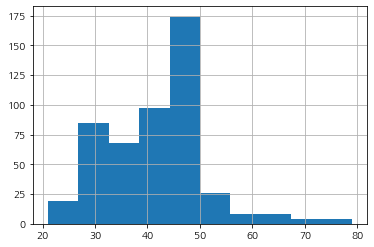

In [61]:
df_우수고객정보["나이"].hist()

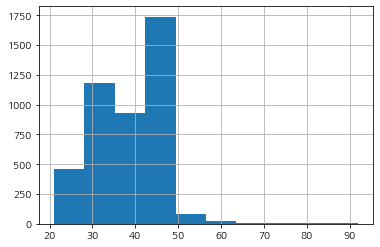

In [62]:
df_일반고객정보["나이"].hist()

In [63]:
df_우수고객정보["우수고객"] = True
df_일반고객정보["우수고객"] = False

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
df_고객정보 = pd.concat([df_우수고객정보, df_일반고객정보])

df_고객정보

총구매금액  구매횟수       주문자ID       구매당지불금액    나이   유입경로 유입기기 사업자구분   우수고객
0     2400000     2       pp209  1.200000e+06  63.0     기타   PC    개인   True
1     1457500     2     arookee  7.287500e+05  48.0  블로그광고  모바일    개인   True
2      638000     1       pp448  6.380000e+05  38.0   신문광고   PC   사업자   True
3     8257140    13       pp748  6.351646e+05  30.0  유튜브광고   PC    개인   True
4      485000     1  59546668@n  4.850000e+05  50.0  블로그광고  모바일    개인   True
...       ...   ...         ...           ...   ...    ...  ...   ...    ...
4452        0     1      myno16  0.000000e+00  39.0   지인추천  모바일    개인  False
4453        0     1     ktj3343  0.000000e+00  44.0  전단지광고   PC   사업자  False
4454        0     1  20579739@n  0.000000e+00  47.0  SNS광고  모바일    개인  False
4455        0     1  74351228@n  0.000000e+00  47.0  SNS광고  모바일    개인  False
4456        0     1     euna410  0.000000e+00  48.0  블로그광고   PC    개인  False

[4942 rows x 9 columns]

# 나이대 별로 총구매금액 합계확인

In [265]:
def 나이대분류(나이):
    나이대 = 0
    if 나이 > 90:
        나이대 = 90
    elif 나이 > 80:
        나이대 = 80
    elif 나이 > 70:
        나이대 = 70
    elif 나이 > 60:
        나이대 = 60
    elif 나이 > 50:
        나이대 = 50
    elif 나이 > 40:
        나이대 = 40
    elif 나이 > 30:
        나이대 = 30
    elif 나이 > 20:
        나이대 = 20
    elif 나이 > 10:
        나이대 = 10
    else:
        나이대 = 0
    return 나이대

In [258]:
df_고객정보["나이"] = df_고객정보["나이"].apply(나이대분류)

In [259]:
df_고객정보

총구매금액  구매횟수       주문자ID       구매당지불금액  나이   유입경로 유입기기 사업자구분   우수고객
0     2400000     2       pp209  1.200000e+06  60     기타   PC    개인   True
1     1457500     2     arookee  7.287500e+05  40  블로그광고  모바일    개인   True
2      638000     1       pp448  6.380000e+05  30   신문광고   PC   사업자   True
3     8257140    13       pp748  6.351646e+05  20  유튜브광고   PC    개인   True
4      485000     1  59546668@n  4.850000e+05  40  블로그광고  모바일    개인   True
...       ...   ...         ...           ...  ..    ...  ...   ...    ...
4452        0     1      myno16  0.000000e+00  30   지인추천  모바일    개인  False
4453        0     1     ktj3343  0.000000e+00  40  전단지광고   PC   사업자  False
4454        0     1  20579739@n  0.000000e+00  40  SNS광고  모바일    개인  False
4455        0     1  74351228@n  0.000000e+00  40  SNS광고  모바일    개인  False
4456        0     1     euna410  0.000000e+00  40  블로그광고   PC    개인  False

[4942 rows x 9 columns]

In [260]:
df_우수고객 = df_고객정보[df_고객접근정보["구매당지불금액"] >= df_고객접근정보["구매당지불금액"][445]]

df_일반고객 = df_고객정보[df_고객접근정보["구매당지불금액"] < df_고객접근정보["구매당지불금액"][445]]

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
df_우수고객나이별총구매액 = df_우수고객[["나이", "구매당지불금액"]].groupby("나이").sum()
df_우수고객나이별총구매액["나이"] = df_우수고객나이별총구매액.index
df_우수고객나이별총구매액.index = [i for i in range(len(df_우수고객나이별총구매액))]

df_우수고객나이별총구매액

KeyError: "['나이'] not in index"

<BarContainer object of 8 artists>

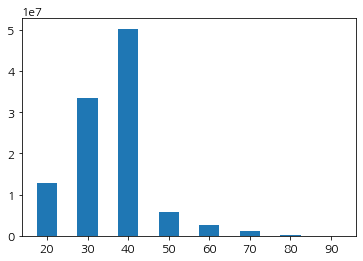

In [314]:
df_우수나이 = df_우수고객나이별총구매액["나이"]
df_우수금액 = df_우수고객나이별총구매액["구매당지불금액"]

우수나이_list = df_우수나이.to_list()
우수나이_list.append(90)
우수금액_list = df_우수금액.to_list()
우수금액_list.append(0)

w = 0.4
plt.bar(우수나이_list, 우수금액_list, width = 5.0)

<BarContainer object of 8 artists>

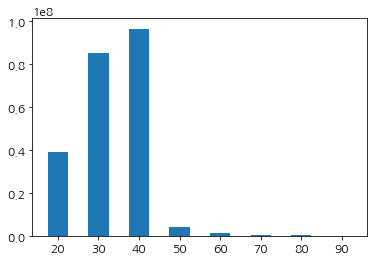

In [319]:
df_일반나이 = df_일반고객나이별총구매액["나이"]
df_일반금액 = df_일반고객나이별총구매액["구매당지불금액"]
일반금액_list = df_일반금액.to_list()

plt.bar(df_일반나이, df_일반금액, width = 5.0)

<BarContainer object of 8 artists>

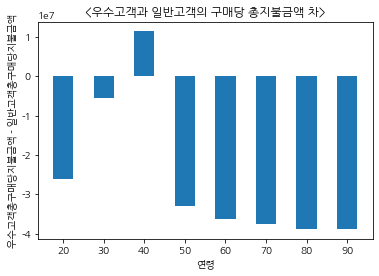

In [398]:
df_우수금액 = pd.DataFrame(우수금액_list)
df_우수금액
df_우수나이 = pd.DataFrame(우수나이_list)
df_우수나이

df_금액차이 = df_우수금액 - df_일반금액
df_고객나이 = df_우수나이


df_금액차이 = df_금액차이.drop([i for i in range(1, 8)], axis = 1)
df_금액차이
df_고객나이

금액차이_list = df_금액차이[0].to_list()
금액차이_list

plt.rc("font", size = 10)
plt.xlabel("연령")
plt.ylabel("우수고객총구매당지불금액 - 일반고객총구매당지불금액")
plt.title("<우수고객과 일반고객의 구매당 총지불금액 차>")
plt.bar(우수나이_list, 금액차이_list, width = 5.0)

In [66]:
df_우수유입경로 = df_우수고객["유입경로"]
df_우수유입경로

df_우수유입경로.value_counts()

KeyError: '유입경로'

In [392]:
67+ 66+61+54+39+25+22+15

349

In [68]:
유입경로_list = ["유튜브광고", "블로그광고", "SNS광고", "전단지광고", "기타"]
경로빈도_list = df_우수유입경로.value_counts().values


경로빈도_list = list(경로빈도_list)
경로확률_list = 경로빈도_list[0:4]
경로확률_list.append(sum(경로빈도_list[4:13]))


print(경로빈도_list[4:13])

print(경로확률_list)

df_경로확률 = pd.DataFrame(경로확률_list)
df_경로확률 /= len(df_우수유입경로)

print(df_경로확률)

#print(경로확률_list)

labels = 유입경로_list
ratio = df_경로확률


plt.rc("font", size = 12)
#plt.xlabel("연령")
#plt.ylabel("우수고객총구매당지불금액 - 일반고객총구매당지불금액")
plt.title("<우수고객의 유입경로>")
plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

NameError: name 'df_우수유입경로' is not defined

In [270]:
df_일반고객나이별총구매액 = df_일반고객[["나이", "구매당지불금액"]].groupby("나이").sum()
df_일반고객나이별총구매액["나이"] = df_일반고객나이별총구매액.index
df_일반고객나이별총구매액.index = [i for i in range(len(df_일반고객나이별총구매액))]

df_일반고객나이별총구매액

구매당지불금액  나이
0  3.888821e+07  20
1  8.532806e+07  30
2  9.647883e+07  40
3  4.164974e+06  50
4  1.083230e+06  60
5  5.715406e+05  70
6  2.077694e+05  80
7  1.125533e+05  90

In [87]:
df_고객정보.to_csv("고객.csv", mode = "w")

In [88]:
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [89]:
df_dummy = df_고객정보[["유입경로", "유입기기", "사업자구분"]]
df_origin = df_고객정보.drop(["총구매금액", "구매횟수", "주문자ID", "구매당지불금액", "유입경로", "유입기기", "사업자구분"], axis = 1)

df_dummy = pd.get_dummies(df_dummy)
df_dummy

유입경로_SNS광고  유입경로_기타  유입경로_블로그광고  유입경로_신문광고  유입경로_유튜브광고  유입경로_이메일광고  \
0              0        1           0          0           0           0   
1              0        0           1          0           0           0   
2              0        0           0          1           0           0   
3              0        0           0          0           1           0   
4              0        0           1          0           0           0   
...          ...      ...         ...        ...         ...         ...   
4452           0        0           0          0           0           0   
4453           0        0           0          0           0           0   
4454           1        0           0          0           0           0   
4455           1        0           0          0           0           0   
4456           0        0           1          0           0           0   

      유입경로_인터넷검색  유입경로_인터넷기사광고  유입경로_잡지광고  유입경로_전단지광고  유입경로_지인추천  유입경로_카카오톡광고  \
0              0             0          0           0          0            0   
1              0             0          0           0          0            0   
2              0             0          0           0          0            0   
3              0             0          0           0          0            0   
4              0             0          0           0          0            0   
...          ...           ...        ...         ...        ...          ...   
4452           0             0          0           0          1            0   
4453           0             0          0           1          0            0   
4454           0             0          0           0          0            0   
4455           0             0          0           0          0            0   
4456           0             0          0           0          0            0   

      유입기기_PC  유입기기_모바일  사업자구분_개인  사업자구분_사업자  사업자구분_외국인  
0           1         0         1          0          0  
1           0         1         1          0          0  
2           1         0         0          1          0  
3           1         0         1          0          0  
4           0         1         1          0          0  
...       ...       ...       ...        ...        ...  
4452        0         1         1          0          0  
4453        1         0         0          1          0  
4454        0         1         1          0          0  
4455        0         1         1          0          0  
4456        1         0         1          0          0  

[4942 rows x 17 columns]

In [90]:
df_고객정보 = pd.concat([df_origin, df_dummy], axis = 1)

In [91]:
df_고객정보.head(100)

나이  우수고객  유입경로_SNS광고  유입경로_기타  유입경로_블로그광고  유입경로_신문광고  유입경로_유튜브광고  \
0    63.0  True           0        1           0          0           0   
1    48.0  True           0        0           1          0           0   
2    38.0  True           0        0           0          1           0   
3    30.0  True           0        0           0          0           1   
4    50.0  True           0        0           1          0           0   
5    50.0  True           0        0           1          0           0   
6    41.0  True           0        0           0          0           1   
7    47.0  True           0        1           0          0           0   
8    49.0  True           0        0           0          0           0   
9    51.0  True           0        0           1          0           0   
10   51.0  True           0        0           1          0           0   
11   45.0  True           0        0           1          0           0   
12   36.0  True           0        0           0          0           0   
13   45.0  True           0        1           0          0           0   
15   59.0  True           0        0           0          0           0   
16   48.0  True           0        0           1          0           0   
17   49.0  True           0        0           1          0           0   
18   37.0  True           0        0           0          1           0   
19   66.0  True           0        0           0          0           0   
20   57.0  True           0        0           0          0           0   
21   63.0  True           0        0           0          0           0   
22   30.0  True           0        0           0          0           1   
23   53.0  True           0        0           1          0           0   
24   34.0  True           0        0           0          0           0   
25   48.0  True           0        0           1          0           0   
26   79.0  True           0        0           0          1           0   
27   29.0  True           0        1           0          0           0   
28   48.0  True           0        0           1          0           0   
29   47.0  True           0        0           0          0           0   
30   33.0  True           0        0           0          0           0   
31   41.0  True           0        0           0          0           0   
32   47.0  True           0        1           0          0           0   
33   47.0  True           0        0           1          0           0   
34   48.0  True           0        0           1          0           0   
35   33.0  True           0        0           0          0           1   
36   35.0  True           0        0           0          0           1   
37   43.0  True           1        0           0          0           0   
38   38.0  True           0        0           0          1           0   
39   75.0  True           0        0           0          1           0   
40   33.0  True           0        0           0          0           1   
41   64.0  True           0        0           0          0           0   
42   46.0  True           0        1           0          0           0   
43   28.0  True           0        0           0          0           0   
44   51.0  True           0        0           1          0           0   
45   32.0  True           0        0           0          0           1   
46   35.0  True           0        0           0          0           1   
47   40.0  True           0        0           0          0           0   
48   34.0  True           0        0           0          0           1   
49   47.0  True           0        0           1          0           0   
50   50.0  True           0        0           1          0           0   
51   59.0  True           0        1           0          0           0   
52   71.0  True           0        0           0          1           0   
53   65.0  True           0     

In [92]:
#목표변수, 설명변수 데이터 지정
df_고객정보_y = df_고객정보["우수고객"]
df_고객정보_x = df_고객정보.drop(["우수고객"], axis=1)

In [93]:
df_고객정보_y

0        True
1        True
2        True
3        True
4        True
        ...  
4452    False
4453    False
4454    False
4455    False
4456    False
Name: 우수고객, Length: 4942, dtype: bool

In [94]:
df_고객정보_x

나이  유입경로_SNS광고  유입경로_기타  유입경로_블로그광고  유입경로_신문광고  유입경로_유튜브광고  \
0     63.0           0        1           0          0           0   
1     48.0           0        0           1          0           0   
2     38.0           0        0           0          1           0   
3     30.0           0        0           0          0           1   
4     50.0           0        0           1          0           0   
...    ...         ...      ...         ...        ...         ...   
4452  39.0           0        0           0          0           0   
4453  44.0           0        0           0          0           0   
4454  47.0           1        0           0          0           0   
4455  47.0           1        0           0          0           0   
4456  48.0           0        0           1          0           0   

      유입경로_이메일광고  유입경로_인터넷검색  유입경로_인터넷기사광고  유입경로_잡지광고  유입경로_전단지광고  유입경로_지인추천  \
0              0           0             0          0           0          0   
1              0           0             0          0           0          0   
2              0           0             0          0           0          0   
3              0           0             0          0           0          0   
4              0           0             0          0           0          0   
...          ...         ...           ...        ...         ...        ...   
4452           0           0             0          0           0          1   
4453           0           0             0          0           1          0   
4454           0           0             0          0           0          0   
4455           0           0             0          0           0          0   
4456           0           0             0          0           0          0   

      유입경로_카카오톡광고  유입기기_PC  유입기기_모바일  사업자구분_개인  사업자구분_사업자  사업자구분_외국인  
0               0        1         0         1          0          0  
1               0        0         1         1          0          0  
2               0        1         0         0          1          0  
3               0        1         0         1          0          0  
4               0        0         1         1          0          0  
...           ...      ...       ...       ...        ...        ...  
4452            0        0         1         1          0          0  
4453            0        1         0         0          1          0  
4454            0        0         1         1          0          0  
4455            0        0         1         1          0          0  
4456            0        1         0         1          0          0  

[4942 rows x 18 columns]

In [95]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_고객정보_x, df_고객정보_y, test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (3459, 18)
train data Y size : (3459,)
test data X size : (1483, 18)
test data Y size : (1483,)


In [96]:
df_train_x

나이  유입경로_SNS광고  유입경로_기타  유입경로_블로그광고  유입경로_신문광고  유입경로_유튜브광고  \
3904  48.0           0        0           1          0           0   
4177  30.0           0        0           0          0           0   
1867  43.0           0        0           0          0           0   
3686  32.0           0        0           0          0           0   
3642  45.0           0        1           0          0           0   
...    ...         ...      ...         ...        ...         ...   
172   40.0           0        0           0          0           1   
2789  45.0           0        1           0          0           0   
826   36.0           0        0           0          0           0   
231   46.0           1        0           0          0           0   
2375  47.0           1        0           0          0           0   

      유입경로_이메일광고  유입경로_인터넷검색  유입경로_인터넷기사광고  유입경로_잡지광고  유입경로_전단지광고  유입경로_지인추천  \
3904           0           0             0          0           0          0   
4177           1           0             0          0           0          0   
1867           0           0             0          0           1          0   
3686           0           0             0          0           1          0   
3642           0           0             0          0           0          0   
...          ...         ...           ...        ...         ...        ...   
172            0           0             0          0           0          0   
2789           0           0             0          0           0          0   
826            1           0             0          0           0          0   
231            0           0             0          0           0          0   
2375           0           0             0          0           0          0   

      유입경로_카카오톡광고  유입기기_PC  유입기기_모바일  사업자구분_개인  사업자구분_사업자  사업자구분_외국인  
3904            0        0         1         1          0          0  
4177            0        1         0         1          0          0  
1867            0        0         1         0          1          0  
3686            0        1         0         1          0          0  
3642            0        0         1         1          0          0  
...           ...      ...       ...       ...        ...        ...  
172             0        1         0         1          0          0  
2789            0        1         0         0          1          0  
826             0        1         0         1          0          0  
231             0        0         1         1          0          0  
2375            0        0         1         1          0          0  

[3459 rows x 18 columns]

In [97]:
df_train_y

3904    False
4177    False
1867    False
3686    False
3642    False
        ...  
172     False
2789    False
826     False
231     False
2375    False
Name: 우수고객, Length: 3459, dtype: bool

In [98]:
para_lr = [lr*0.1 for lr in range(1,10)]
para_n_tree = [n_tree*10 for n_tree in range(1,16)]
para_depth = [depth for depth in range(1,11)]
para_split = [n_split*10 for n_split in range(2,11)]
para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

In [99]:
estimator = DecisionTreeClassifier(random_state=1234)

param_grid={"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

best parameter:
{'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score:
0.903


In [102]:
print("test score :", grid_dt.score(df_test_x, df_test_y))

y_pred = grid_dt.predict(df_test_x)
print('Confustion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

test score : 0.8927848954821308
Confustion matrix: 
[[1324    0]
 [ 159    0]]


In [106]:
dt_precision = 1324 / (1324 + 0)
dt_recall = 1324 / (1324 + 159)
dt_f1 = 2 * (dt_precision * dt_recall) / (dt_precision + dt_recall)

print("dt_precision :", dt_precision)
print("dt_recall :", dt_recall)
print("dt_f1 :", dt_f1) # 분류 정확도

dt_precision : 1.0
dt_recall : 0.8927848954821308
dt_f1 : 0.9433558959743498


In [ ]:
dt_final.predict_proba(df_사용자입력)[0][1]

In [107]:
estimator = RandomForestClassifier(random_state=1234)

param_grid={"n_estimators":para_n_tree, "max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter:
{'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 10}

best score:
0.903


In [232]:
print(grid_rf.score(df_test_x, df_test_y))

y_pred = grid_rf.predict(df_test_x)
print('Confustion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

0.8927848954821308
Confustion matrix: 
[[1324    0]
 [ 159    0]]


In [234]:
rf_precision = 1324 / (1324 + 0)
rf_recall = 1324 / (1324 + 159)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)

print("rf_precision :", rf_precision)
print("rf_recall :", rf_recall)
print("rf_f1 :", rf_f1) # 분류 정확도

rf_precision : 1.0
rf_recall : 0.8927848954821308
rf_f1 : 0.9433558959743498


In [258]:
grid_rf.predict(df_사용자입력)

array([False])

In [259]:
grid_rf.predict_proba(df_사용자입력)[0][0]

0.8930238102515962

In [234]:
estimator = GradientBoostingClassifier(random_state=1234)

param_grid={"learning_rate":para_lr, "n_estimators":para_n_tree, "max_depth":para_depth, "min_samples_leaf":para_leaf}

grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model:\n{}".format(grid_gb.best_estimator_))
print("\nbest parameter:\n{}".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))

best estimator model:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.30000000000000004, loss='deviance',
                           max_depth=2, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

best parameter:
{'learning_rate': 0.30000000000000004, 'max_depth': 2, 'min_samples_leaf': 20, 'n_estimators': 40}

best score:
0.904


In [236]:
grid_gb.score(df_test_x, df_test_y)

0.8934592043155766

# 우수회원 예측 최종 모델

In [229]:
gb_final = GradientBoostingClassifier(learning_rate=0.30000000000000004, max_depth=2, min_samples_leaf=20, n_estimators=40, random_state=1234)
gb_final.fit(df_train_x, df_train_y)



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.30000000000000004, loss='deviance',
                           max_depth=2, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [230]:
print("test score :", gb_final.score(df_test_x, df_test_y))

y_pred = grid_rf.predict(df_test_x)
print('Confustion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

test score : 0.8934592043155766
Confustion matrix: 
[[1324    0]
 [ 159    0]]


In [252]:
gb_final.predict(df_사용자입력)

array([ True])

In [261]:
gb_final.predict(df_사용자입력)
gb_final.predict_proba(df_사용자입력)[0][1]

0.5448591887383928

In [235]:
gb_precision = 1324 / (1324 + 0)
gb_recall = 1324 / (1324 + 159)
gb_f1 = 2 * (gb_precision * gb_recall) / (gb_precision + gb_recall)

print("gb_precision :", gb_precision)
print("gb_recall :", gb_recall)
print("gb_f1 :", gb_f1) # 분류 정확도

gb_precision : 1.0
gb_recall : 0.8927848954821308
gb_f1 : 0.9433558959743498


In [274]:
from yellowbrick.classifier import ROCAUC

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.5353322312793327


/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


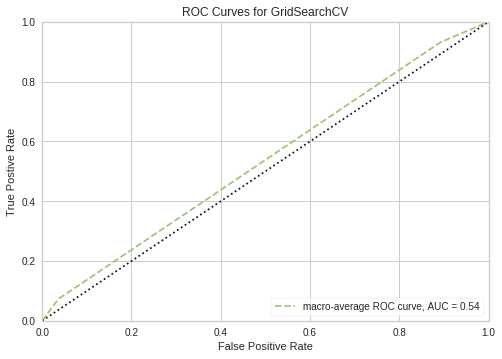

In [280]:
visualizer = ROCAUC(grid_dt, classes = [0 , 1], micro = False, macor = True, per_class = False)
visualizer.fit(df_train_x, df_train_y)
print(visualizer.score(df_test_x, df_test_y))
visualizer.show()

0.5812367693101554


/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


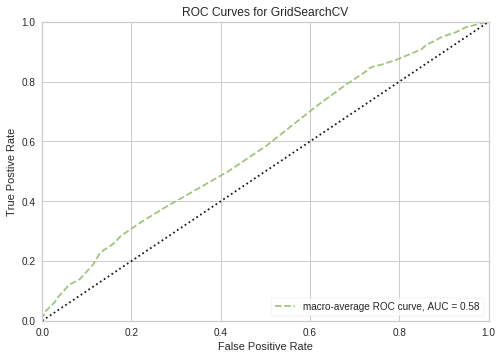

In [281]:
visualizer = ROCAUC(grid_rf, classes = [0 , 1], micro = False, macor = True, per_class = False)
visualizer.fit(df_train_x, df_train_y)
print(visualizer.score(df_test_x, df_test_y))
visualizer.show()

0.6735276624791136


/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


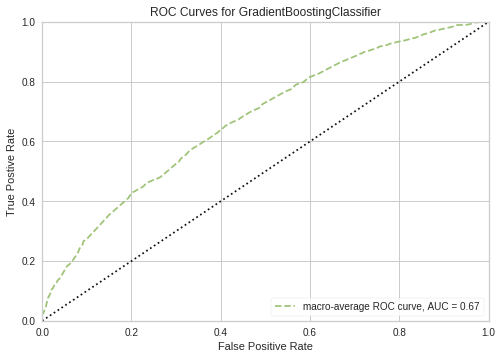

In [279]:
visualizer = ROCAUC(gb_final, classes = [0 , 1], micro = False, macor = True, per_class = False)
visualizer.fit(df_train_x, df_train_y)
print(visualizer.score(df_test_x, df_test_y))
visualizer.show()

In [242]:
# 설명변수 중요도 확인 및 테이블 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = df_고객정보_x.columns
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

Feature  Importance
0             나이       0.641
11     유입경로_지인추천       0.076
5     유입경로_유튜브광고       0.063
14      유입기기_모바일       0.049
15      사업자구분_개인       0.036
6     유입경로_이메일광고       0.026
8   유입경로_인터넷기사광고       0.026
4      유입경로_신문광고       0.024
7     유입경로_인터넷검색       0.019
2        유입경로_기타       0.017
13       유입기기_PC       0.011
16     사업자구분_사업자       0.007
10    유입경로_전단지광고       0.006
9      유입경로_잡지광고       0.000
12   유입경로_카카오톡광고       0.000
1     유입경로_SNS광고       0.000
3     유입경로_블로그광고       0.000
17     사업자구분_외국인       0.000

Text(0, 0.5, 'Variables')

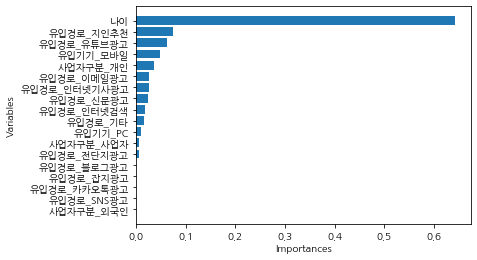

In [243]:
# 설명변수 중요도 그래프
# 중요도가 높은 것을 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importances")
plt.ylabel("Variables")

나이   우수고객  유입경로_SNS광고  유입경로_기타  유입경로_블로그광고  유입경로_신문광고  유입경로_유튜브광고  \
0     63.0   True           0        1           0          0           0   
1     48.0   True           0        0           1          0           0   
2     38.0   True           0        0           0          1           0   
3     30.0   True           0        0           0          0           1   
4     50.0   True           0        0           1          0           0   
...    ...    ...         ...      ...         ...        ...         ...   
4452  39.0  False           0        0           0          0           0   
4453  44.0  False           0        0           0          0           0   
4454  47.0  False           1        0           0          0           0   
4455  47.0  False           1        0           0          0           0   
4456  48.0  False           0        0           1          0           0   

      유입경로_이메일광고  유입경로_인터넷검색  유입경로_인터넷기사광고  유입경로_잡지광고  유입경로_전단지광고  유입경로_지인추천  \
0              0           0             0          0           0          0   
1              0           0             0          0           0          0   
2              0           0             0          0           0          0   
3              0           0             0          0           0          0   
4              0           0             0          0           0          0   
...          ...         ...           ...        ...         ...        ...   
4452           0           0             0          0           0          1   
4453           0           0             0          0           1          0   
4454           0           0             0          0           0          0   
4455           0           0             0          0           0          0   
4456           0           0             0          0           0          0   

      유입경로_카카오톡광고  유입기기_PC  유입기기_모바일  사업자구분_개인  사업자구분_사업자  사업자구분_외국인  
0               0        1         0         1          0          0  
1               0        0         1         1          0          0  
2               0        1         0         0          1          0  
3               0        1         0         1          0          0  
4               0        0         1         1          0          0  
...           ...      ...       ...       ...        ...        ...  
4452            0        0         1         1          0          0  
4453            0        1         0         0          1          0  
4454            0        0         1         1          0          0  
4455            0        0         1         1          0          0  
4456            0        1         0         1          0          0  

[4942 rows x 19 columns]

In [290]:
df_order["상품구매금액"].sum()

3242891385

# 사용자 입력 인풋형태 맞추기

In [238]:
# 사용자 인풋 예시

나이 = "59"
유입경로 = "인터넷기사광고"
유입기기 = "모바일"
사업자구분 = "개인"

사용자입력_list = [유입경로, 유입기기, 사업자구분]

In [239]:
# 사용자입력 컨테이
df_사용자입력 = pd.DataFrame(columns = ["유입경로", "유입기기", "사업자구분"])

df_사용자입력.loc[0] = 사용자입력_list

df_사용자입력

유입경로 유입기기 사업자구분
0  인터넷기사광고  모바일    개인

In [240]:
# 더미 구현

#df_사용자나이 = df_사용자입력["나이"]

#df_입력더미 = df_사용자입력.drop(["나이"], axis = 1)

df_입력더미 = pd.get_dummies(df_사용자입력)

df_입력더미

입력포맷_set = set(df_입력더미.columns.to_list())

더미포맷_set = set(["유입경로_SNS광고", "유입경로_기타", "유입경로_블로그광고", "유입경로_신문광고", "유입경로_유튜브광고", "유입경로_이메일광고", "유입경로_인터넷검색", "유입경로_인터넷기사광고", "유입경로_잡지광고", "유입경로_전단지광고", "유입경로_지인추천", "유입경로_카카오톡광고", "유입기기_PC", "유입기기_모바일", "사업자구분_개인", "사업자구분_사업자", "사업자구분_외국인"])

In [241]:
입력포맷_set

{'사업자구분_개인', '유입경로_인터넷기사광고', '유입기기_모바일'}

In [242]:
더미포맷_set

{'사업자구분_개인',
 '사업자구분_사업자',
 '사업자구분_외국인',
 '유입경로_SNS광고',
 '유입경로_기타',
 '유입경로_블로그광고',
 '유입경로_신문광고',
 '유입경로_유튜브광고',
 '유입경로_이메일광고',
 '유입경로_인터넷검색',
 '유입경로_인터넷기사광고',
 '유입경로_잡지광고',
 '유입경로_전단지광고',
 '유입경로_지인추천',
 '유입경로_카카오톡광고',
 '유입기기_PC',
 '유입기기_모바일'}

In [243]:
추가포맷 = list(더미포맷_set - 입력포맷_set)

추가포맷

['유입경로_SNS광고',
 '유입경로_지인추천',
 '유입경로_기타',
 '사업자구분_사업자',
 '유입경로_전단지광고',
 '유입경로_신문광고',
 '유입기기_PC',
 '유입경로_유튜브광고',
 '유입경로_잡지광고',
 '유입경로_이메일광고',
 '유입경로_블로그광고',
 '사업자구분_외국인',
 '유입경로_인터넷검색',
 '유입경로_카카오톡광고']

In [244]:
for col in 추가포맷:
    df_입력더미[col] = 0

In [245]:
df_입력더미

유입경로_인터넷기사광고  유입기기_모바일  사업자구분_개인  유입경로_SNS광고  유입경로_지인추천  유입경로_기타  \
0             1         1         1           0          0        0   

   사업자구분_사업자  유입경로_전단지광고  유입경로_신문광고  유입기기_PC  유입경로_유튜브광고  유입경로_잡지광고  \
0          0           0          0        0           0          0   

   유입경로_이메일광고  유입경로_블로그광고  사업자구분_외국인  유입경로_인터넷검색  유입경로_카카오톡광고  
0           0           0          0           0            0

In [246]:
df_입력더미["나이"] = 나이

df_입력더미

유입경로_인터넷기사광고  유입기기_모바일  사업자구분_개인  유입경로_SNS광고  유입경로_지인추천  유입경로_기타  \
0             1         1         1           0          0        0   

   사업자구분_사업자  유입경로_전단지광고  유입경로_신문광고  유입기기_PC  유입경로_유튜브광고  유입경로_잡지광고  \
0          0           0          0        0           0          0   

   유입경로_이메일광고  유입경로_블로그광고  사업자구분_외국인  유입경로_인터넷검색  유입경로_카카오톡광고  나이  
0           0           0          0           0            0  59

In [247]:
df_사용자입력 = df_입력더미.reindex(columns = ["나이", "유입경로_SNS광고", "유입경로_기타", "유입경로_블로그광고", "유입경로_신문광고", "유입경로_유튜브광고", "유입경로_이메일광고", "유입경로_인터넷검색", "유입경로_인터넷기사광고", "유입경로_잡지광고", "유입경로_전단지광고", "유입경로_지인추천", "유입경로_카카오톡광고", "유입기기_PC", "유입기기_모바일", "사업자구분_개인", "사업자구분_사업자", "사업자구분_외국인"])

df_사용자입력

나이  유입경로_SNS광고  유입경로_기타  유입경로_블로그광고  유입경로_신문광고  유입경로_유튜브광고  유입경로_이메일광고  \
0  59           0        0           0          0           0           0   

   유입경로_인터넷검색  유입경로_인터넷기사광고  유입경로_잡지광고  유입경로_전단지광고  유입경로_지인추천  유입경로_카카오톡광고  \
0           0             1          0           0          0            0   

   유입기기_PC  유입기기_모바일  사업자구분_개인  사업자구분_사업자  사업자구분_외국인  
0        0         1         1          0          0

In [248]:
for i,v in enumerate(res.predict(df_test_x)):
    if v == True:
        print(i,v)

NameError: name 'res' is not defined

In [642]:
df_te = df_train_x.iloc[179]

df_test = pd.DataFrame(df_te)

df_test.T

나이  유입경로_SNS광고  유입경로_기타  유입경로_블로그광고  유입경로_신문광고  유입경로_유튜브광고  유입경로_이메일광고  \
15  59.0         0.0      0.0         0.0        0.0         0.0         0.0   

    유입경로_인터넷검색  유입경로_인터넷기사광고  유입경로_잡지광고  유입경로_전단지광고  유입경로_지인추천  유입경로_카카오톡광고  \
15         0.0           1.0        0.0         0.0        0.0          0.0   

    유입기기_PC  유입기기_모바일  사업자구분_개인  사업자구분_사업자  사업자구분_외국인  
15      0.0       1.0       1.0        0.0        0.0

In [644]:
res.predict(df_test.T)[0]

True

# 경쟁사 도표 그리기

In [302]:
# 출처: http://www.career.co.kr/jobs/kangso/company_view.asp?com_idnum=1018693655#comp-summary

삼양파이 = 366292000000 # 3662억 1위
엔피씨파이 = 346721000000 # 3467억 2위
연우파이 = 271933000000 # 2719억 3위
펨텍파이 = 151233000000 # 1512억 4위
크로바파이 = 106466000000 # 1064억 5위
P사파이 = df_order["상품구매금액"].sum() # 3242891385

전체파이 = 삼양파이 + 엔피씨파이 + 연우파이 + 펨텍파이 + 크로바파이 + P사파이
기타파이 = 전체파이 - 삼양파이 - 엔피씨파이 - 연우파이 - P사파이

In [308]:
plt.rc("font", size = 12)

<function matplotlib.pyplot.show(*args, **kw)>

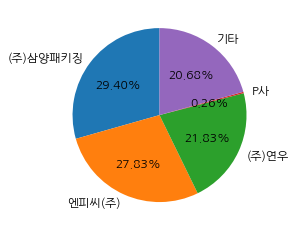

In [309]:
labels = ["(주)삼양패키징", "엔피씨(주)", "(주)연우", "P사", "기타"]
ratio = [삼양파이/전체파이, 엔피씨파이/전체파이, 연우파이/전체파이, P사파이/전체파이, 기타파이/전체파이]

plt.pie(ratio, labels= labels, autopct = "%1.2f%%", shadow= False, startangle= 90)
plt.show

In [ ]:
# 출처: http://www.career.co.kr/jobs/kangso/company_view.asp?com_idnum=1018693655#comp-summary

삼양파이 = 366292000000 # 3662억 1위
엔피씨파이 = 346721000000 # 3467억 2위
연우파이 = 271933000000 # 2719억 3위
펨텍파이 = 151233000000 # 1512억 4위
크로바파이 = 106466000000 # 1064억 5위
P사파이 = df_order["상품구매금액"].sum() # 3242891385

전체파이 = 삼양파이 + 엔피씨파이 + 연우파이 + 펨텍파이 + 크로바파이 + P사파이
기타파이 = 전체파이 - 삼양파이 - 엔피씨파이 - 연우파이 - P사파이

In [262]:
df_order

결제수단     공급원가  교환구분  네이버 포인트                   배송번호 배송비 정보  \
0      무통장입금  44550.0  교환안함        0  D-20181227-0000648-00     무료   
1      무통장입금  44000.0  교환안함        0  D-20181229-0000119-00     무료   
2      무통장입금   6820.0  교환안함        0  D-20181230-0000100-00     무료   
3      무통장입금  49500.0  교환안함        0  D-20181231-0000087-00     무료   
4      무통장입금  61600.0  교환안함        0  D-20181231-0000108-00     무료   
...      ...      ...   ...      ...                    ...    ...   
46744     카드  36300.0  교환안함        0  D-20171229-0000036-00     무료   
46745     카드  36300.0  교환안함        0  D-20171229-0000043-00     무료   
46746     카드  22280.0  교환안함      300  D-20171230-0000022-01     무료   
46747     카드  55000.0  교환안함      320  D-20171231-0000017-01     무료   
46748     카드  52800.0  교환안함        0  D-20171231-0000026-00     무료   

                     배송시작일               배송완료일  사용한 적립금액  상품구매금액  \
0       2019-01-07 오전 8:56  2019-01-11 오전 5:32         0   71450   
1       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0  141240   
2       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0   13910   
3       2019-01-03 오전 9:30  2019-01-07 오전 5:32         0   81600   
4       2019-01-07 오전 8:56  2019-01-11 오전 5:32         0   94710   
...                    ...                 ...       ...     ...   
46744   2017-12-29 오후 4:32  2018-01-02 오전 5:31         0   52800   
46745   2018-01-03 오전 9:45  2018-01-07 오전 5:38         0  112200   
46746   2018-01-02 오후 7:06  2018-01-11 오전 2:46         0   36000   
46747   2018-01-03 오후 2:00  2018-01-06 오후 6:06         0   73460   
46748  2018-01-03 오후 12:43  2018-01-07 오전 5:38         0   81620   

                                                  상품명   상품번호  상품별 추가할인금액  \
0                          195파이 탕용기 소 300개 1set(2박스)   1077       13600   
1      95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)     42       19800   
2                                  비닐봉투 배달중 중 백색 200개   1271        2900   
3                       195파이 미니탕용기 투톤 300개 1set(2박스)   1085       12630   
4                          250파이 원형 접시 미니 블랙 400개 1박스   1106       18000   
...                                               ...    ...         ...   
46744                          PP 4칸 도시락용기 A 200개 1박스  445.0        6340   
46745                         PP 6칸 도시락용기 02 200개 1박스  172.0       13460   
46746                          170mm 수저 투명 1,500개 1박스  140.0        3600   
46747     170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스)  184.0        5140   
46748         125파이 원형용기 중 350ml 백색 PP 600개 1set(2박스)  479.0       12240   

                             수령인 주소    주문경로              주문번호  \
0          경상남도 거제시 능포로 168-1 (능포동)   PC쇼핑몰  20181227-0000648   
1        서울특별시 동대문구 한천로36길 16 (장안동)    모바일웹  20181229-0000119   
2             세종특별자치시 호려울로 29 (보람동)    모바일웹  20181230-0000100   
3         부산광역시 부산진구 가야대로 482 (개금동)    모바일웹  20181231-0000087   
4      부산광역시 해운대구 선수촌로 104-21 (반여동)    모바일웹  20181231-0000108   
...                             ...     ...               ...   
46744    서울특별시 서초구 강남대로97길 23 (잠원동)    모바일웹  20171229-0000036   
46745        경기도 의정부시 용민로 483 (민락동)    모바일웹  20171229-0000043   
46746                 대전광역시 서구 관저2동  네이버 페이  20171230-0000022   
46747         광주광역시 서구 화운로 152 (화정동  네이버 페이  20171231-0000017   
46748   충청남도 천안시 서북구 성환읍 성환리 449-43    모바일웹  20171231-0000026   

                      주문일시       주문자ID      카드사  쿠폰 할인금액    판매가   품목번호    친환경  \
0       2018-12-27 오후 2:54       pp683       기타        0  71450  42602  False   
1       2018-12-29 오후 1:22     asd0908       기타        0  70620  42930  False   
2       2018-12-30 오후 3:15         NaN       기타        0  13910  42998  False   
3      2018-12-31 오전 10:30  23533593@n       기타        0  81600  43063  False   
4      2018-12-31 오전 10:43   romandoll       기타        0  94710  43066  False   
...                    ...         ...      ...      ...    ...    ...    ...   
46744   2017-12-29 오후 1:39  73987748@n       국민        0  52800   3170  False   
46745   

In [263]:
df_member

주문자ID  나이   유입경로 유입기기 사업자구분
0        sr7577  45  블로그광고   PC    개인
1       cgh1385  53  블로그광고  모바일    개인
2        pjkl77  28  이메일광고   PC   사업자
3      aabb8482  44  블로그광고   PC   사업자
4       bear011  40  SNS광고  모바일   사업자
...         ...  ..    ...  ...   ...
6570     pp1730  31  유튜브광고   PC    개인
6571  jsuee8228  45  전단지광고   PC   사업자
6572   aaok0204  47  인터넷검색  모바일   사업자
6573  aaok02044  46  인터넷검색  모바일   사업자
6574   bangha36  47  인터넷검색   PC   사업자

[6575 rows x 5 columns]

In [266]:
df_member["나이"] = df_member["나이"].apply(나이대분류)

In [267]:
df_member

주문자ID  나이   유입경로 유입기기 사업자구분
0        sr7577  40  블로그광고   PC    개인
1       cgh1385  50  블로그광고  모바일    개인
2        pjkl77  20  이메일광고   PC   사업자
3      aabb8482  40  블로그광고   PC   사업자
4       bear011  30  SNS광고  모바일   사업자
...         ...  ..    ...  ...   ...
6570     pp1730  30  유튜브광고   PC    개인
6571  jsuee8228  40  전단지광고   PC   사업자
6572   aaok0204  40  인터넷검색  모바일   사업자
6573  aaok02044  40  인터넷검색  모바일   사업자
6574   bangha36  40  인터넷검색   PC   사업자

[6575 rows x 5 columns]

In [268]:
df_멤버나이 = df_member["나이"]

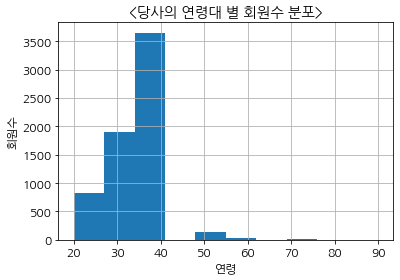

In [272]:
plt.rc("font", size = 12)
plt.xlabel("연령")
plt.ylabel("회원수")
plt.title("<당사의 연령대 별 회원수 분포>")
df_멤버나이.hist()